## Candescence with the GRACE library

## 0. Loading the libraries

In [1]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

In [2]:
import numpy as np
import scipy as sp
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import rcParams
from matplotlib import colors
from umap import UMAP
import graphtools as gt


#import seaborn as sb
#sb.set_context('notebook')

%matplotlib inline
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

plt.rcParams['figure.figsize']=(8,8) #rescale figures
plt.rcParams.update({'figure.max_open_warning': 0})
#sc.settings.set_figure_params(dpi=80)


/home/hallett/anaconda3/envs/deepmicroscopy/lib/python3.7/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


Global path variables

In [3]:
REFINED="/home/data/refined/candescence/performance/grace_tc/"


## 1. Reading in the data

Read in the entire GRACE description spreadsheet. This has all the variables.

In [4]:
everything = pd.read_csv(REFINED+"python_img_summaries_chosenone_thresh_0.3.csv")


In [5]:
everything[['macro_manual_score']] = everything[['macro_manual_score']].astype(str)
everything[['tc_manual_score']] = everything[['tc_manual_score']].astype(str)

In [6]:
all_macro_classes=everything['macro_manual_score'].unique().tolist()
all_tc_classes=everything['tc_manual_score'].unique().tolist()
# force order for making nice pictures
all_tc_classes=['GD','0', '1', '2', 'nan']
all_macro_classes=['E', 'GD', '0', '1', '2', 'nan']

In [7]:
print(everything.columns)

Index(['filename', 'n_objects', 'name.x', 'f_1', 'f_2', 'f_3', 'f_0', 'a_1',
       'a_2', 'a_3', 'a_0', 'plate', 'row', 'column', 'replicate', 'name.y',
       'macro_manual_score', 'tc_manual_score', 'orf', 'common',
       'feature_name', 'description', 'sc_homologue', 'sc_ko_pheno',
       'Merck Strain ID', 'GELC ID', 'Primary CGD ID', 'YPD morphology',
       'YPD + DOX morphology', 'Serum morphology', 'Serum + DOX morphology',
       '100 μg/mL DOX growth', '5-FOA excision', 'No_DOX_score', 'DOX_Score',
       'Essential_verdict', 'Cidal_test', 'Macrophage + DOX morphology TO1',
       'Macrophage + DOX morphology TO2', 'Variance',
       'Screen pilot rep 1 OD600+DOX 19-03-21',
       'Screen pilot rep 1 MO+DOX 19-03-21',
       'Screen pilot rep 2 OD600+DOX 19-03-21',
       'Screen pilot rep 2 MO+DOX 19-03-21',
       'Screen pilot rep 1 OD600-DOX 19-03-21',
       'Screen pilot rep 1 MO-DOX 19-03-21',
       'Screen pilot rep 1 counter+DOX 19-03-21',
       'Screen pilot rep

## 2 UMAP

We create two series of UMAPs. UMAPs attempt to capture essential relationships between the images. The images are described in two ways.
Either using relative values e.g.  $f_0$, the frequency of $0$ labelled cells in an image (but using the vcector across all important classes). Or using absolute values e.g. $a_0$, the raw number of cells of type $0$ in the image.

In [8]:
import umap
reducer = umap.UMAP()

rel_data = everything[ [
        "f_0", "f_1", "f_2", "f_3"
    ]].values

abs_data = everything[ [
        "a_0", "a_1", "a_2", "a_3"
    ]].values


## latent embedding with relative counts


In [9]:
embedding_rel = reducer.fit_transform(rel_data)
embedding_rel.shape

/home/hallett/anaconda3/envs/deepmicroscopy/lib/python3.7/site-packages/numba/np/ufunc/parallel.py:363: NumbaWarning: The TBB threading layer requires TBB version 2019.5 or later i.e., TBB_INTERFACE_VERSION >= 11005. Found TBB_INTERFACE_VERSION = 9107. The TBB threading layer is disabled.
  warnings.warn(problem)
OMP: Info #274: omp_set_nested routine deprecated, please use omp_set_max_active_levels instead.


(6602, 2)

## latent embedding with absolute counts


In [10]:
embedding_abs = reducer.fit_transform(abs_data)
embedding_abs.shape

(6602, 2)

In [11]:
mapper_abs = umap.UMAP().fit(abs_data)

In [12]:
mapper_rel = umap.UMAP().fit(rel_data)

In [13]:
import umap.plot

Here we draw the UMAP and superimpose the manual labels to start. And then changing the coloring according to different variables. Actually I could superimpose any of the variables from teh excel spreadsheet here.

## First map the TC manual scores

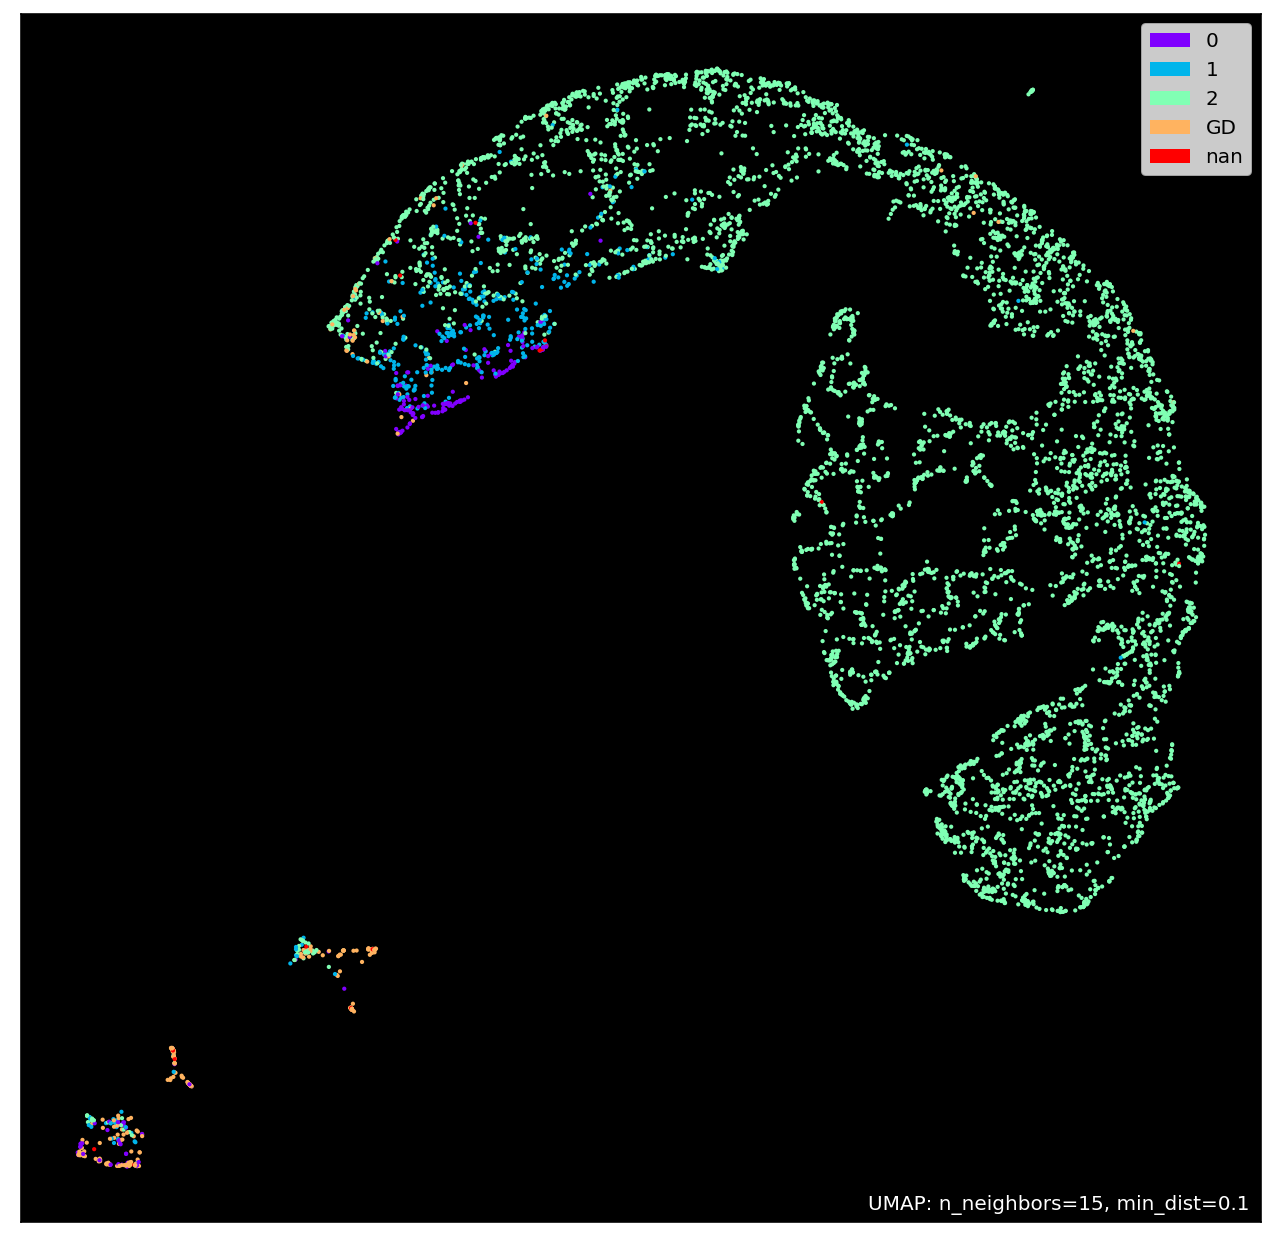

In [14]:
umap.plot.points(mapper_abs,  labels=everything.tc_manual_score, theme='fire') # color_key_cmap='Paired',

## Now map the macro manual scores

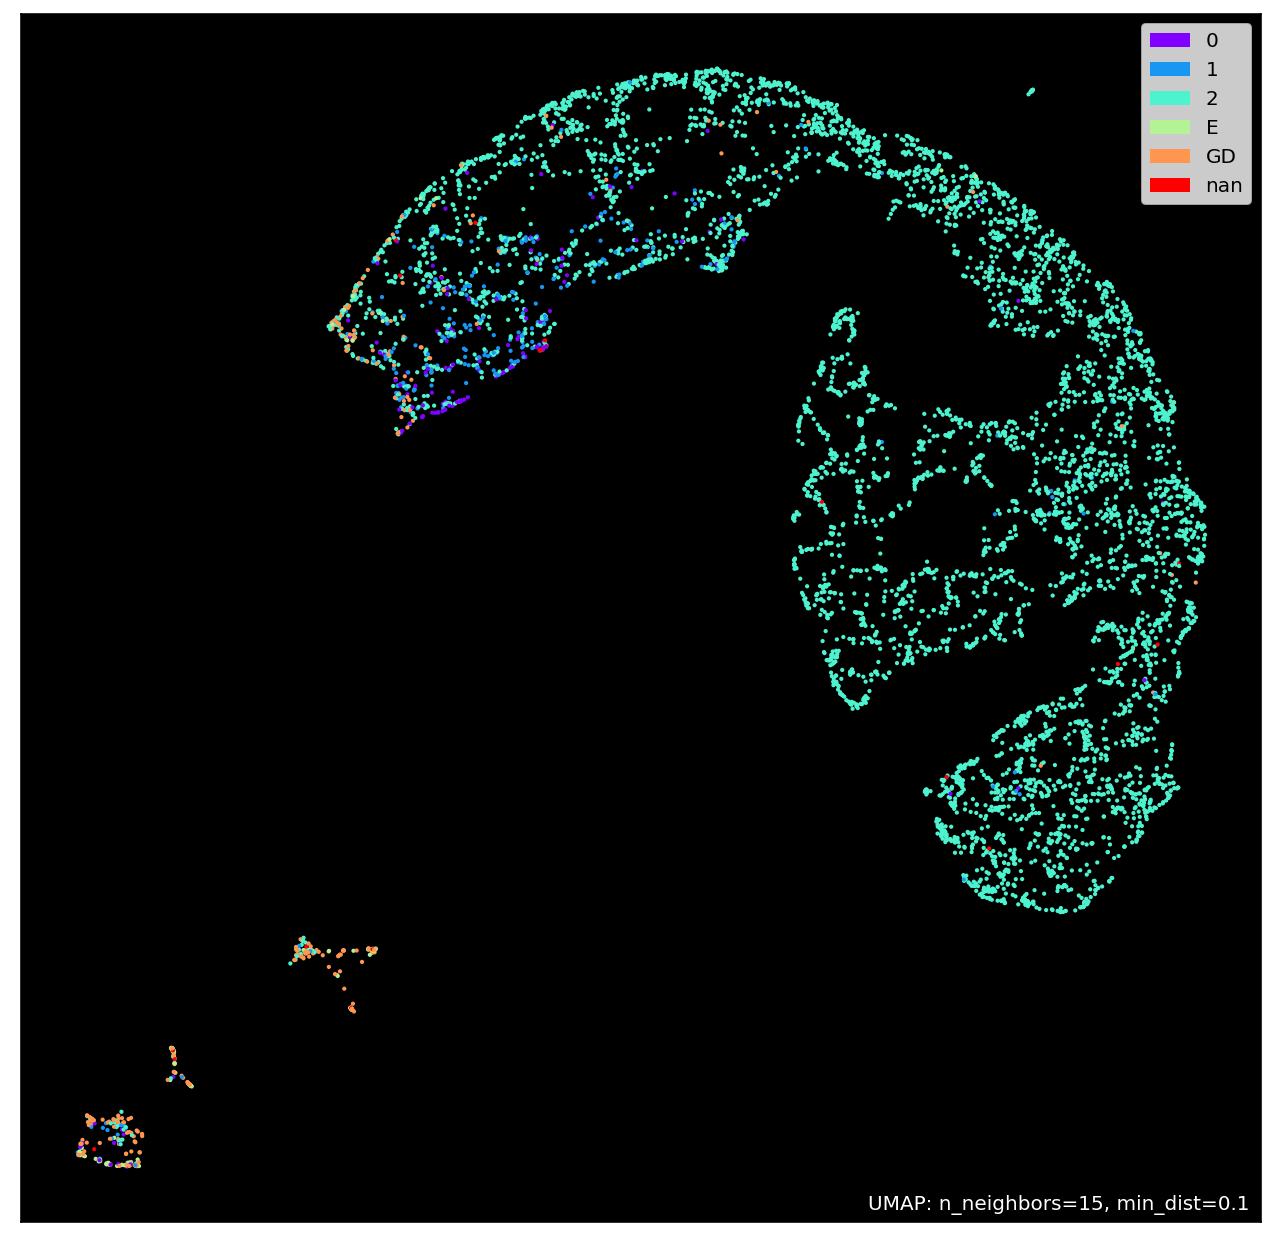

In [15]:
umap.plot.points(mapper_abs,  labels=everything.macro_manual_score, theme='fire') # color_key_cmap='Paired',

You can see that non-class 2 labels above are almost always in sparsely populated cells (next image). Here white is the lowest absolute counts while blue is the highest.

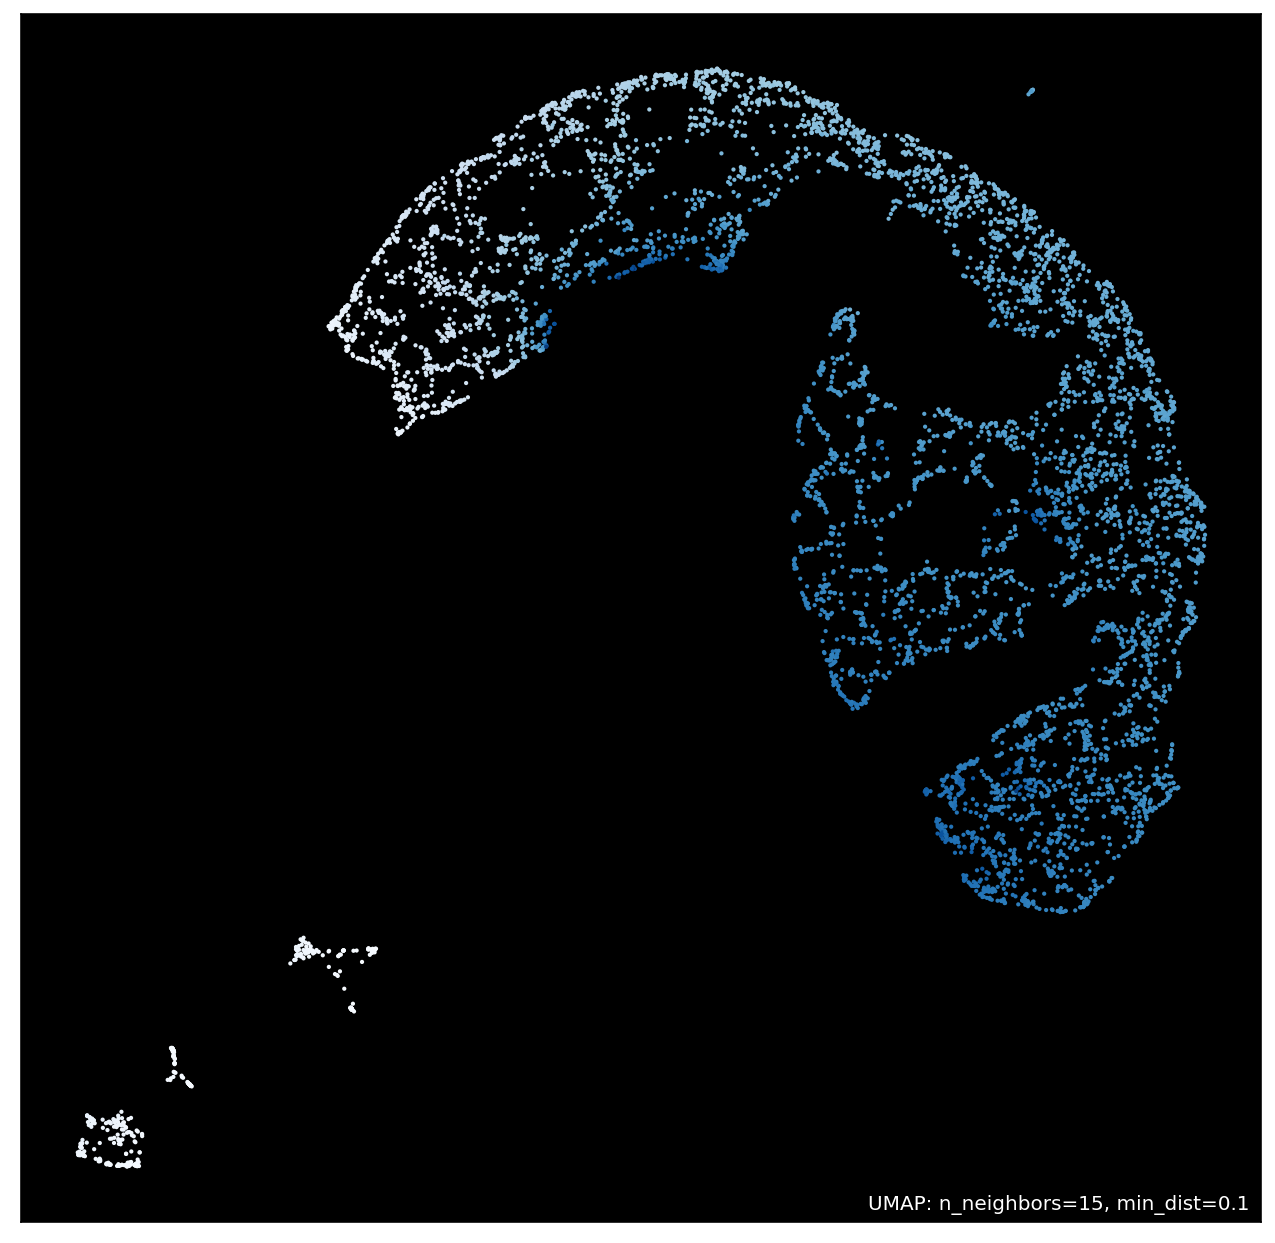

In [16]:
umap.plot.points(mapper_abs,  values=everything.n_objects,  background='black') # color_key_cmap='Paired',

Now a series of images for the absolute counts of 0, 1, 2, 3.

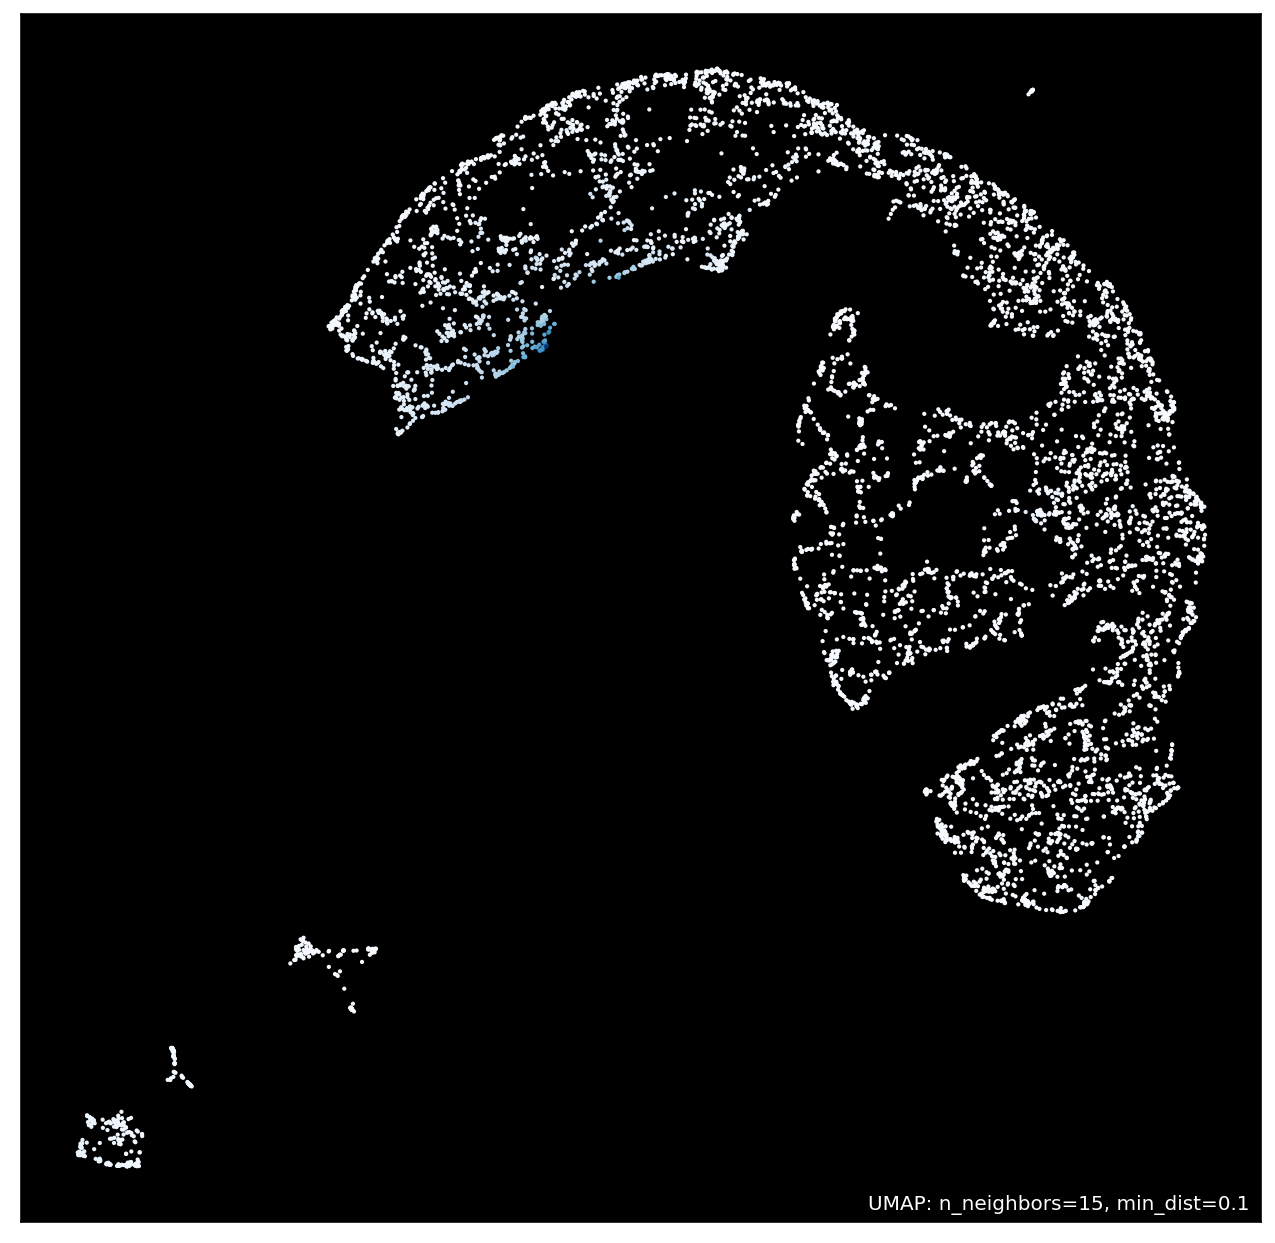

In [17]:
umap.plot.points(mapper_abs,  values=everything.a_0,  background='black') # color_key_cmap='Paired',


You can see here that the right "arm" of the UMAP is highly enriched for images that have many class-1 cells.

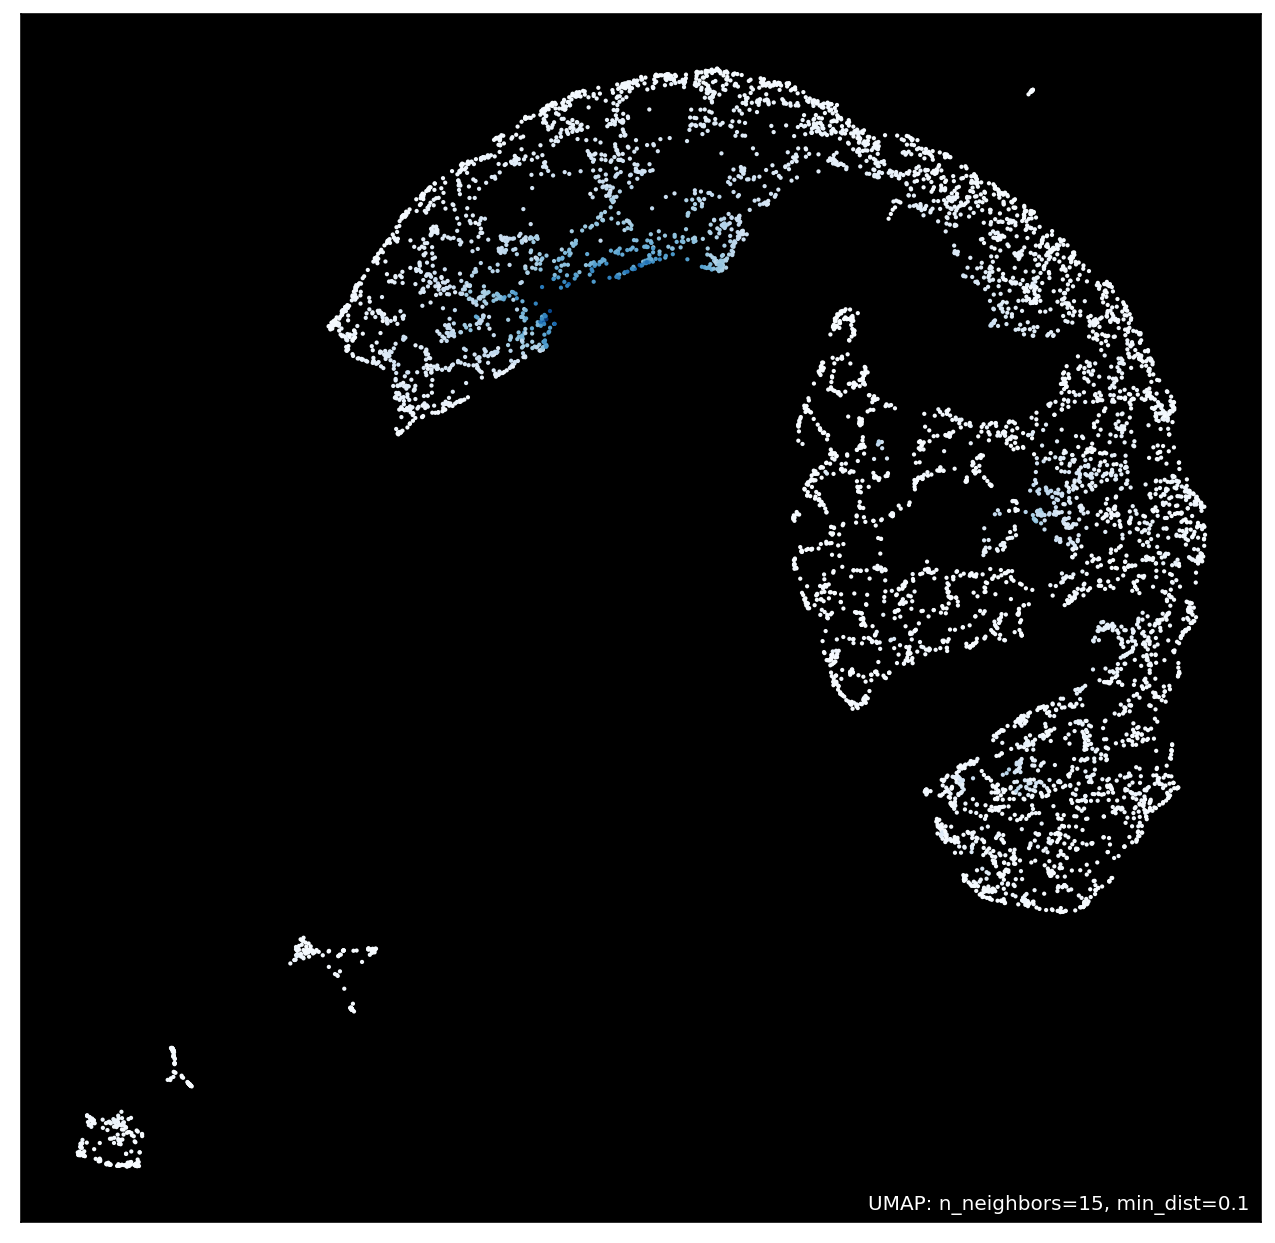

In [18]:
umap.plot.points(mapper_abs,  values=everything.a_1,  background='black') # color_key_cmap='Paired',


Also true for class-2 enriched cells.

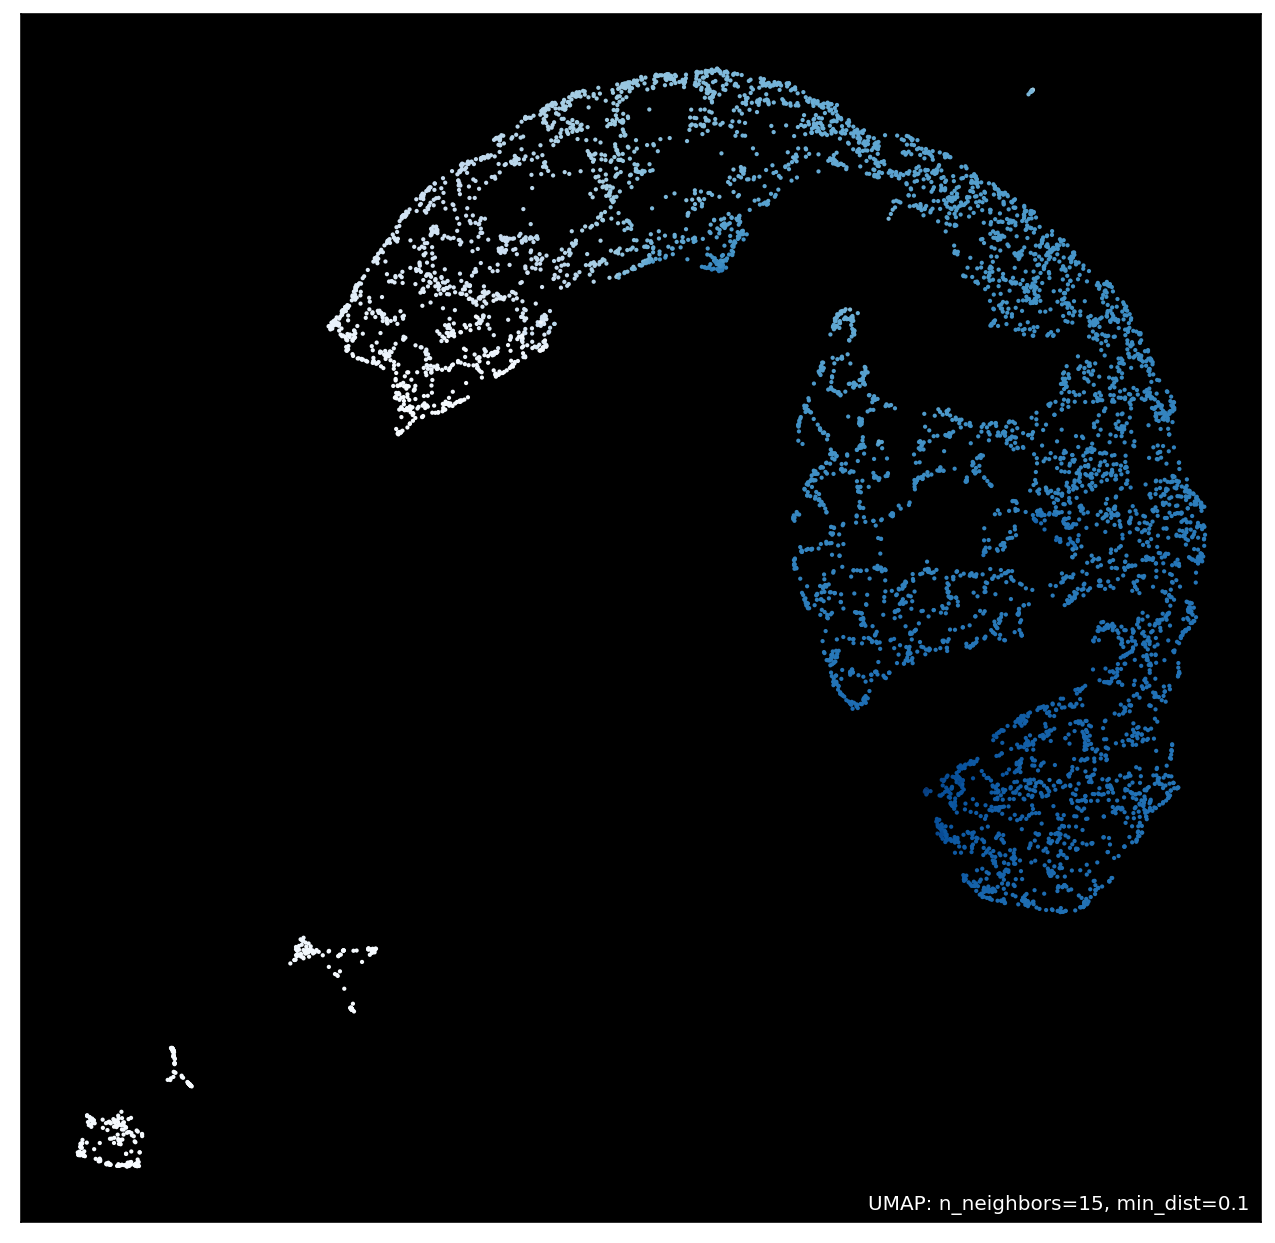

In [19]:
umap.plot.points(mapper_abs,  values=everything.a_2,  background='black') # color_key_cmap='Paired',


Class 3's are scattered across the UMAP, mixed with class 2's for the most part. This makes sense.

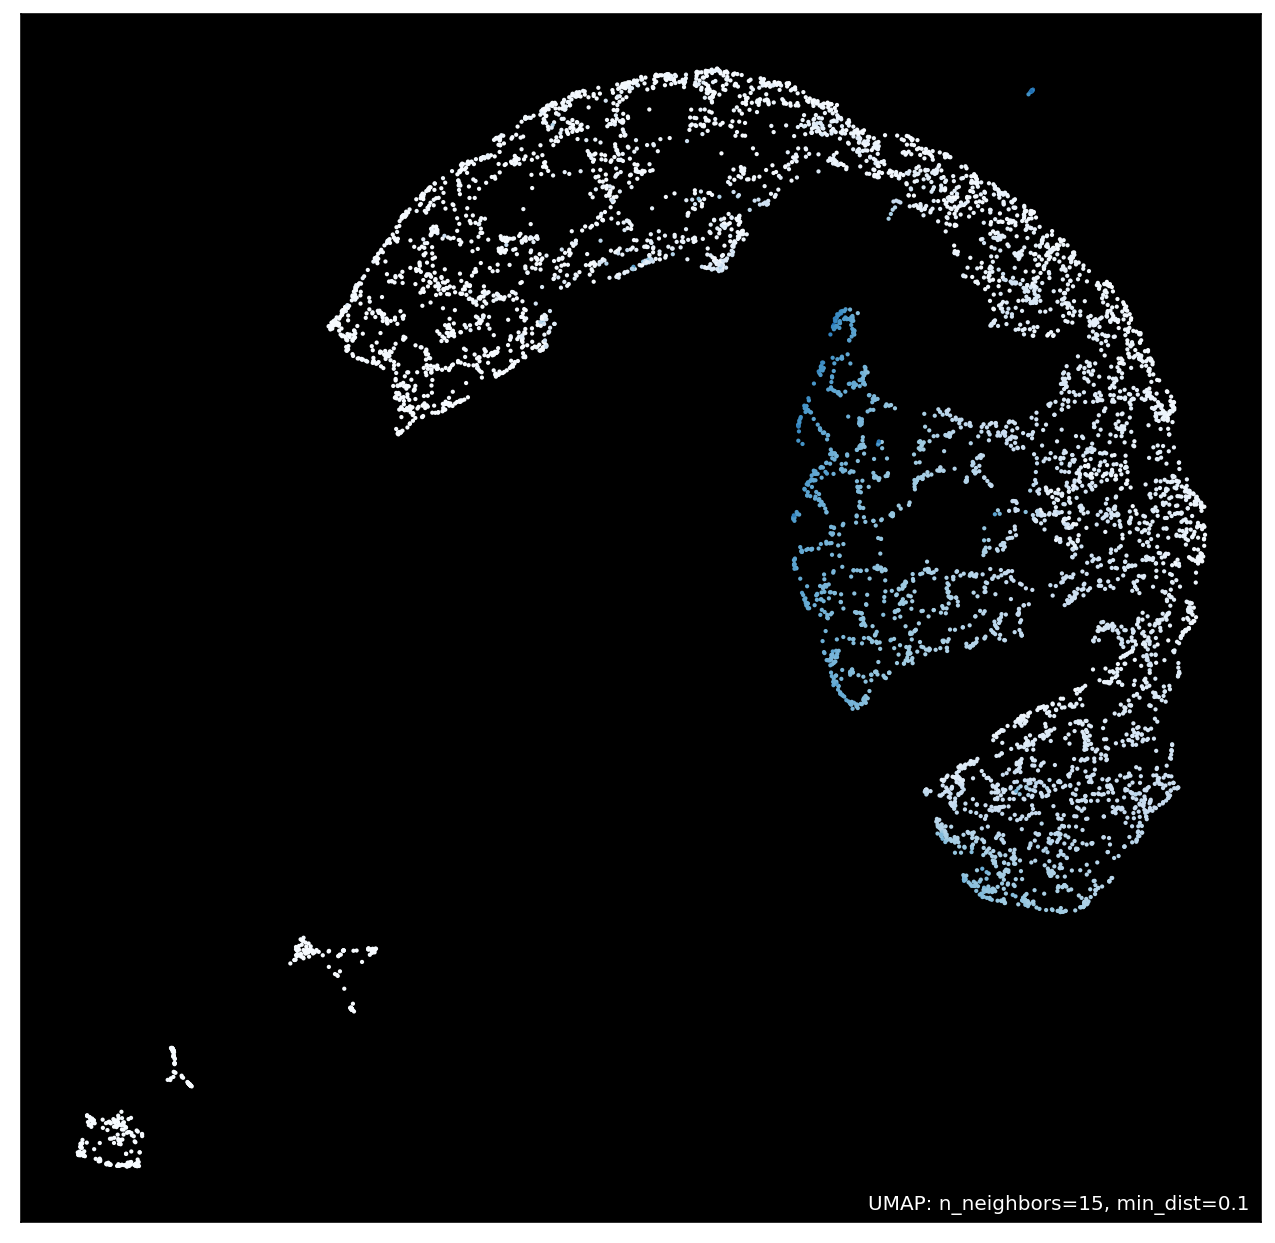

In [20]:
umap.plot.points(mapper_abs,  values=everything.a_3,  background='black') # color_key_cmap='Paired',


## Relative frequencies

I find that mapping the relative frequencies onto this same UMAP is more informative.

In [21]:
mapper_rel = umap.UMAP().fit(rel_data)


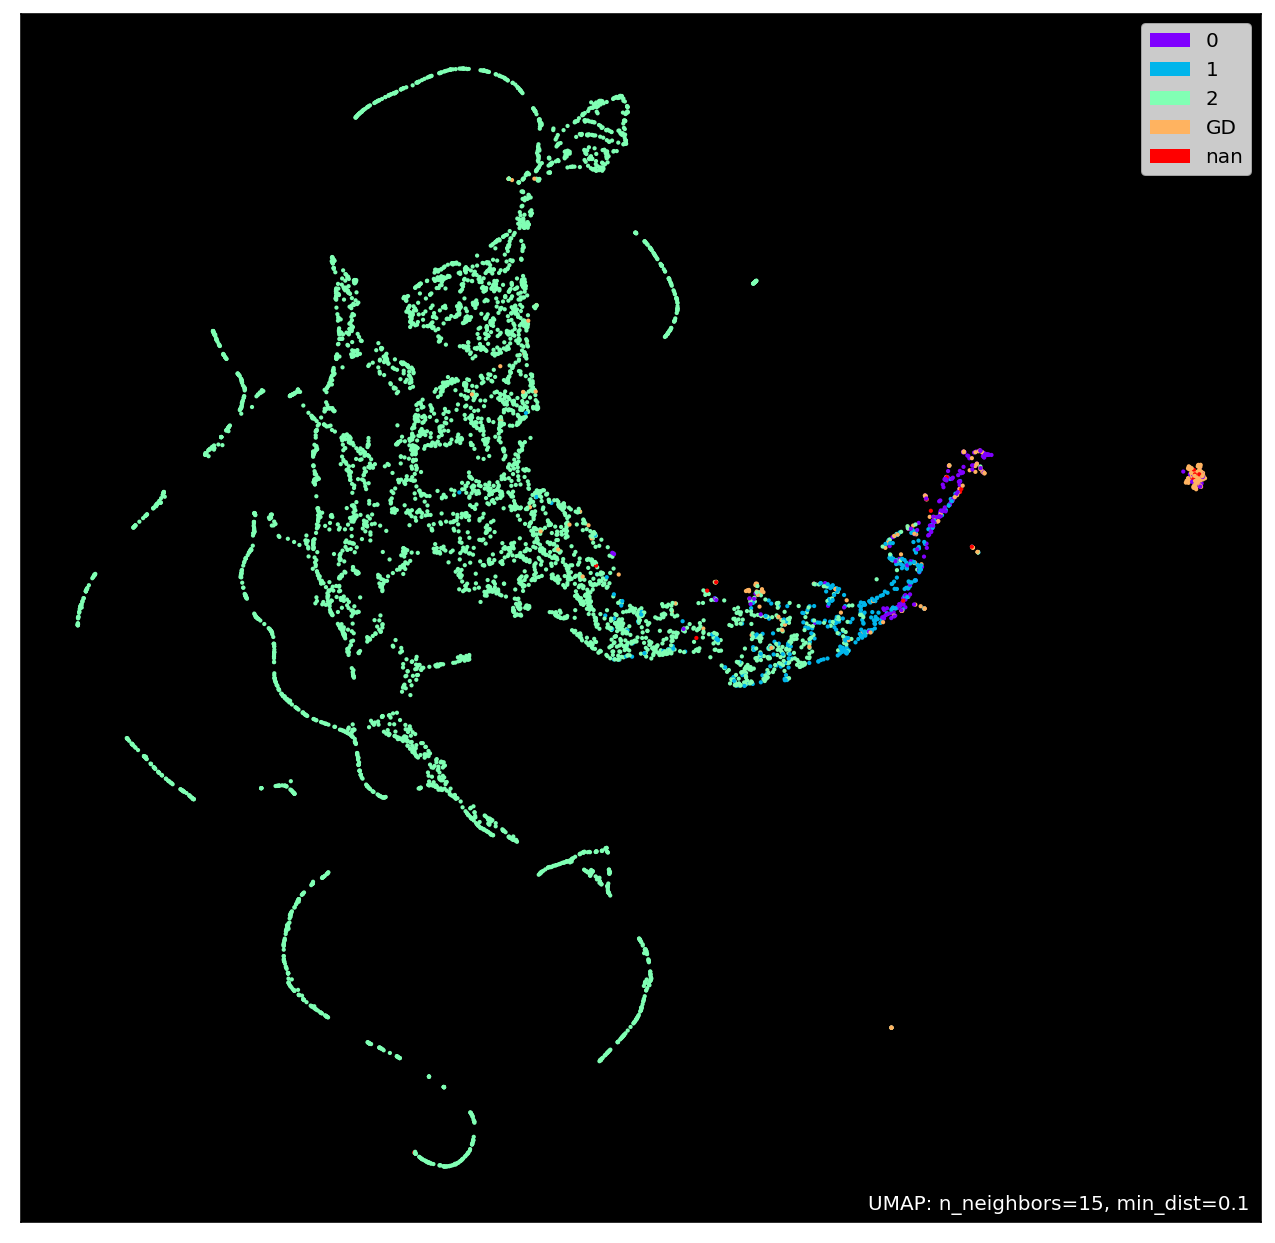

In [22]:
umap.plot.points(mapper_rel,  labels=everything.tc_manual_score, theme='fire') # color_key_cmap='Paired',


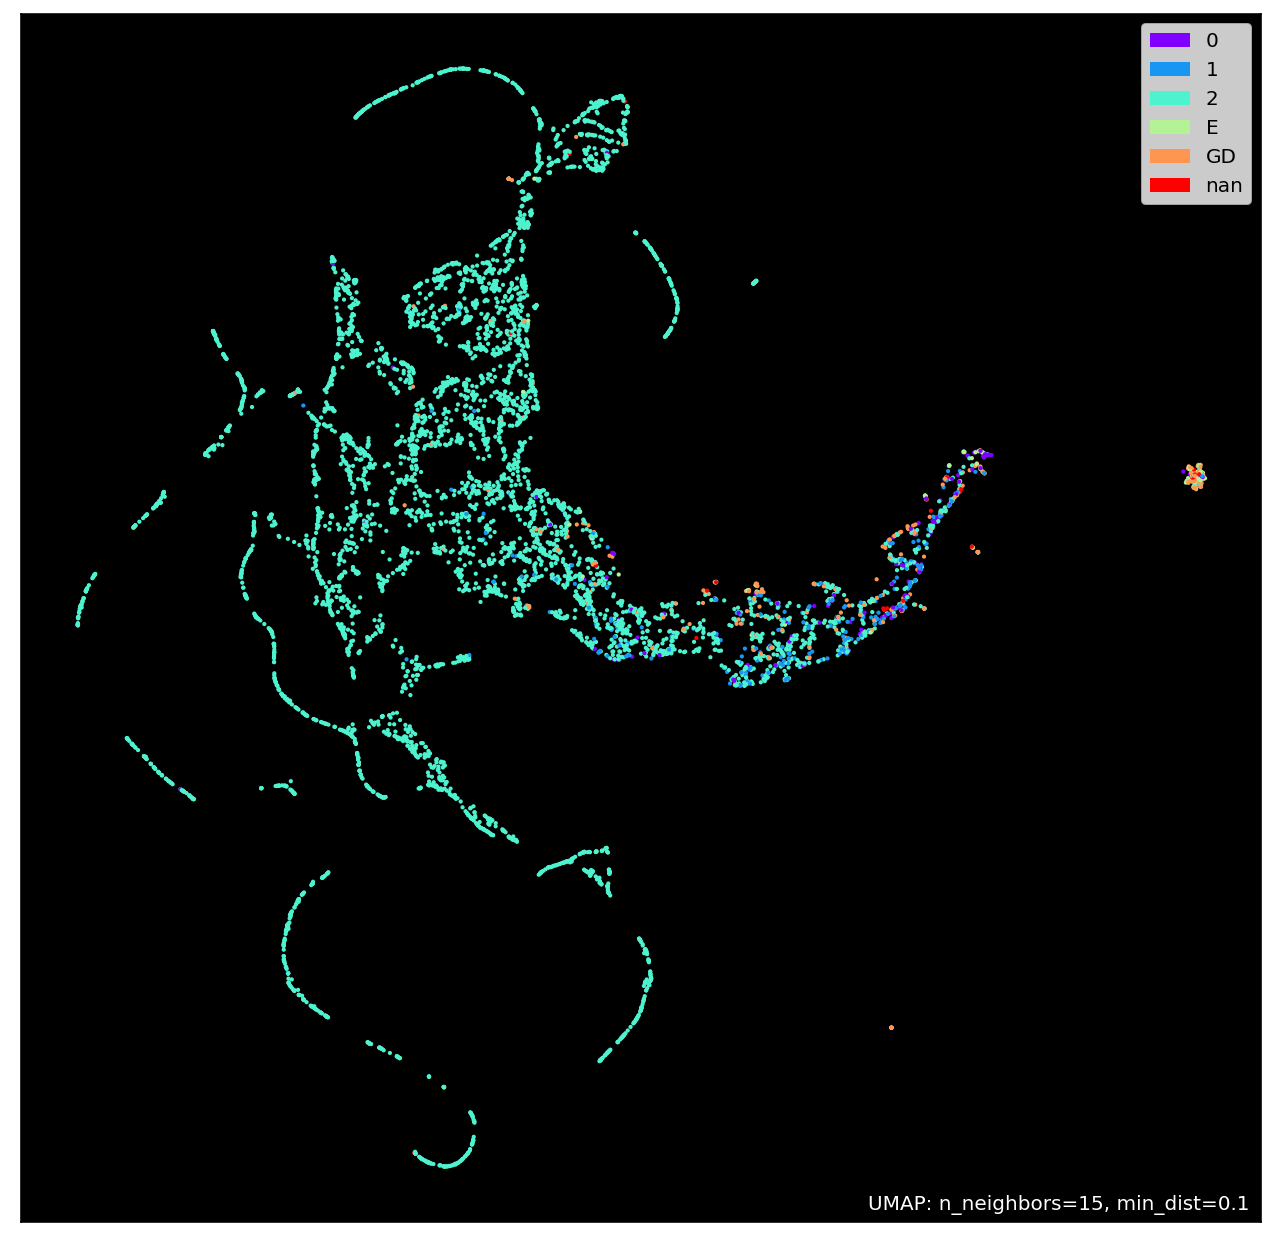

In [23]:
umap.plot.points(mapper_rel,  labels=everything.macro_manual_score, theme='fire') # color_key_cmap='Paired',


Note that the observation about sparsely populated images and non-class 2 labels is also visible in the relative images.

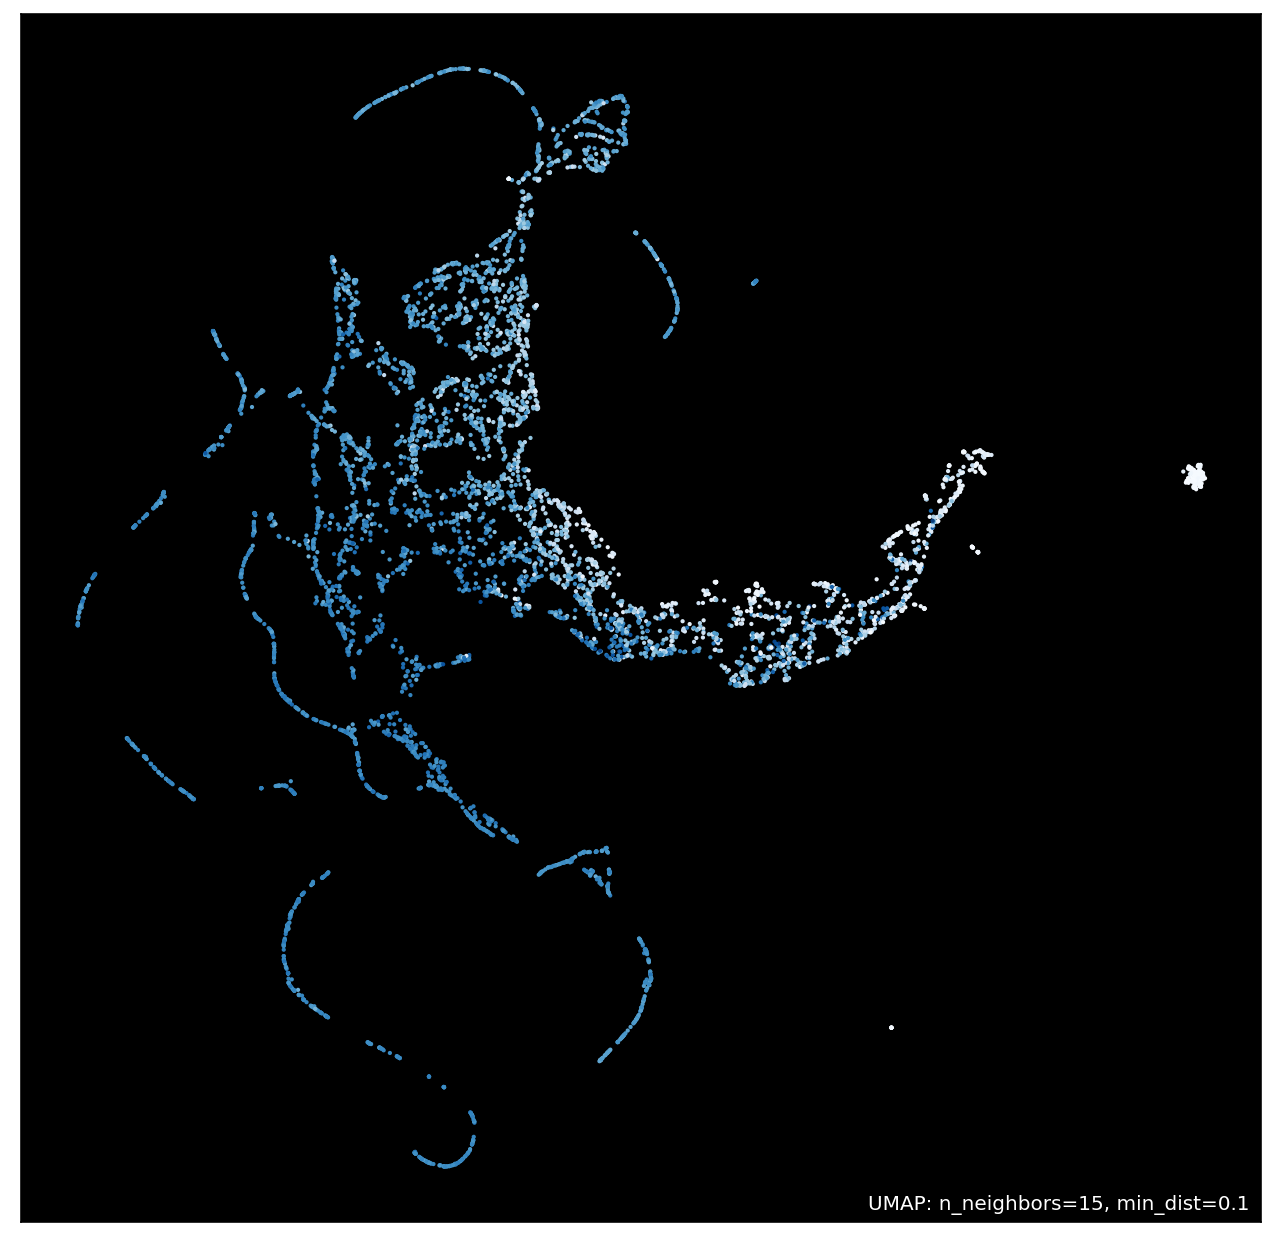

In [24]:
umap.plot.points(mapper_rel,  values=everything.n_objects,  background='black') # color_key_cmap='Paired',


Here you can strongly see the relationship between high relative macrophage (non-infected) cells and non-class 2 cells. This makes sense for the GD labelled cells but it suggests that there has been some human bias for the other classes.

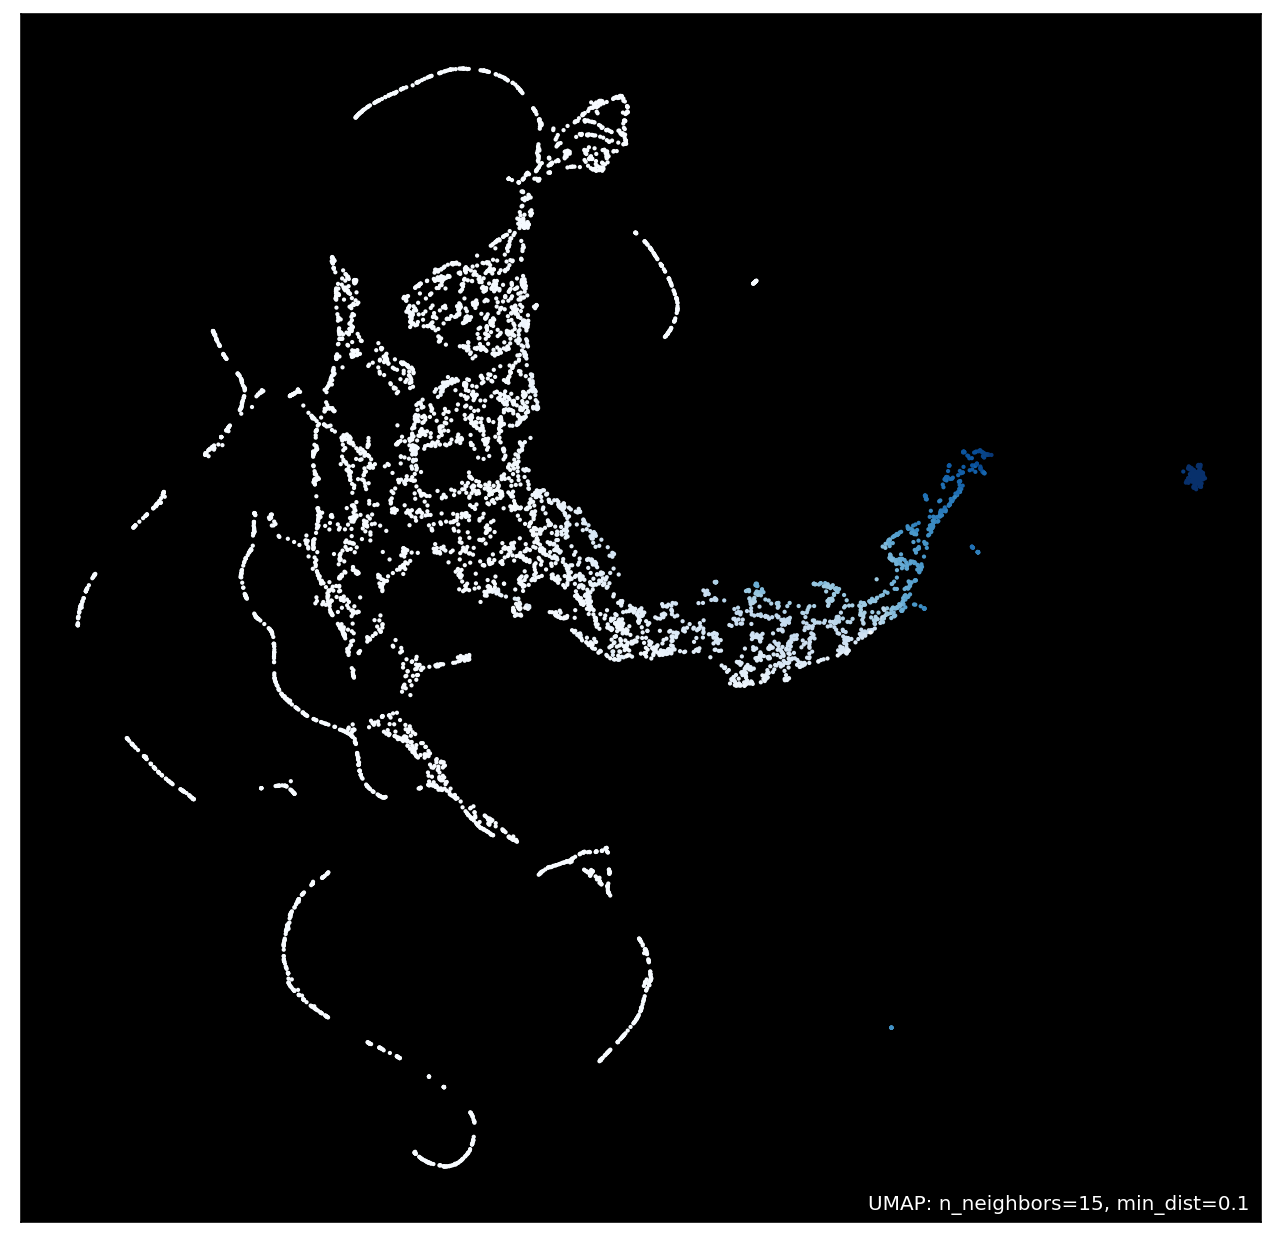

In [25]:
umap.plot.points(mapper_rel,  values=everything.f_0,  background='black') # color_key_cmap='Paired',


In the following two images, you see very clearly that class 1 and class 2 are distinct types of images. They have stable but distinct patterns, although they are close in UMAP space. 

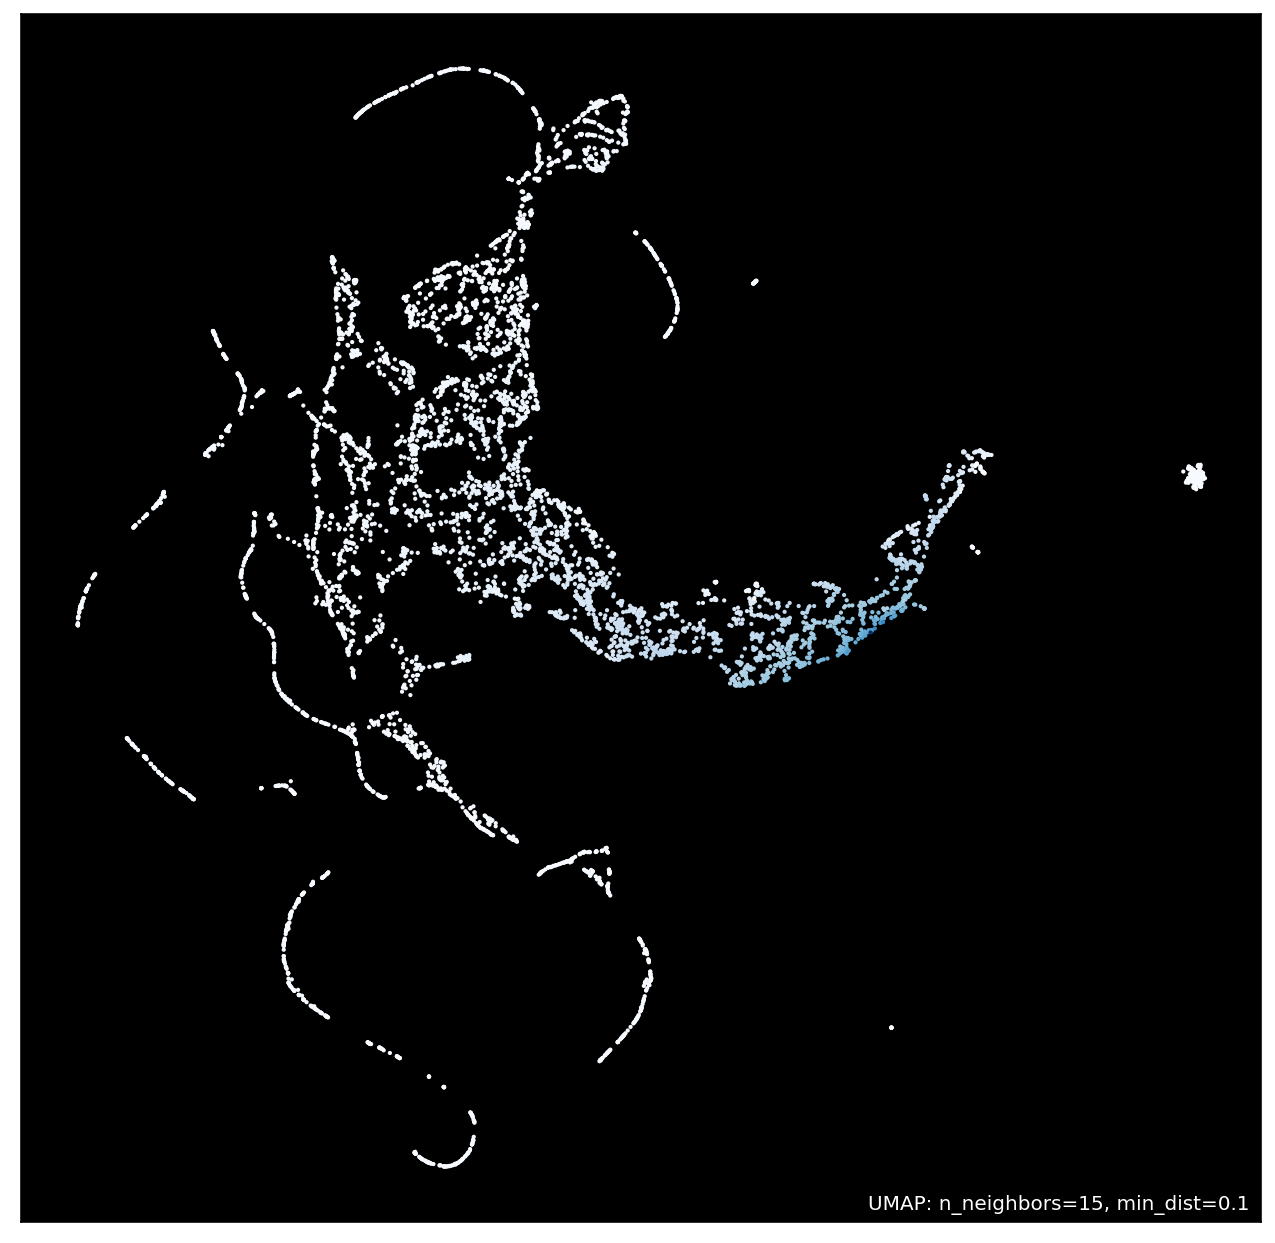

In [26]:
umap.plot.points(mapper_rel,  values=everything.f_1,  background='black') # color_key_cmap='Paired',


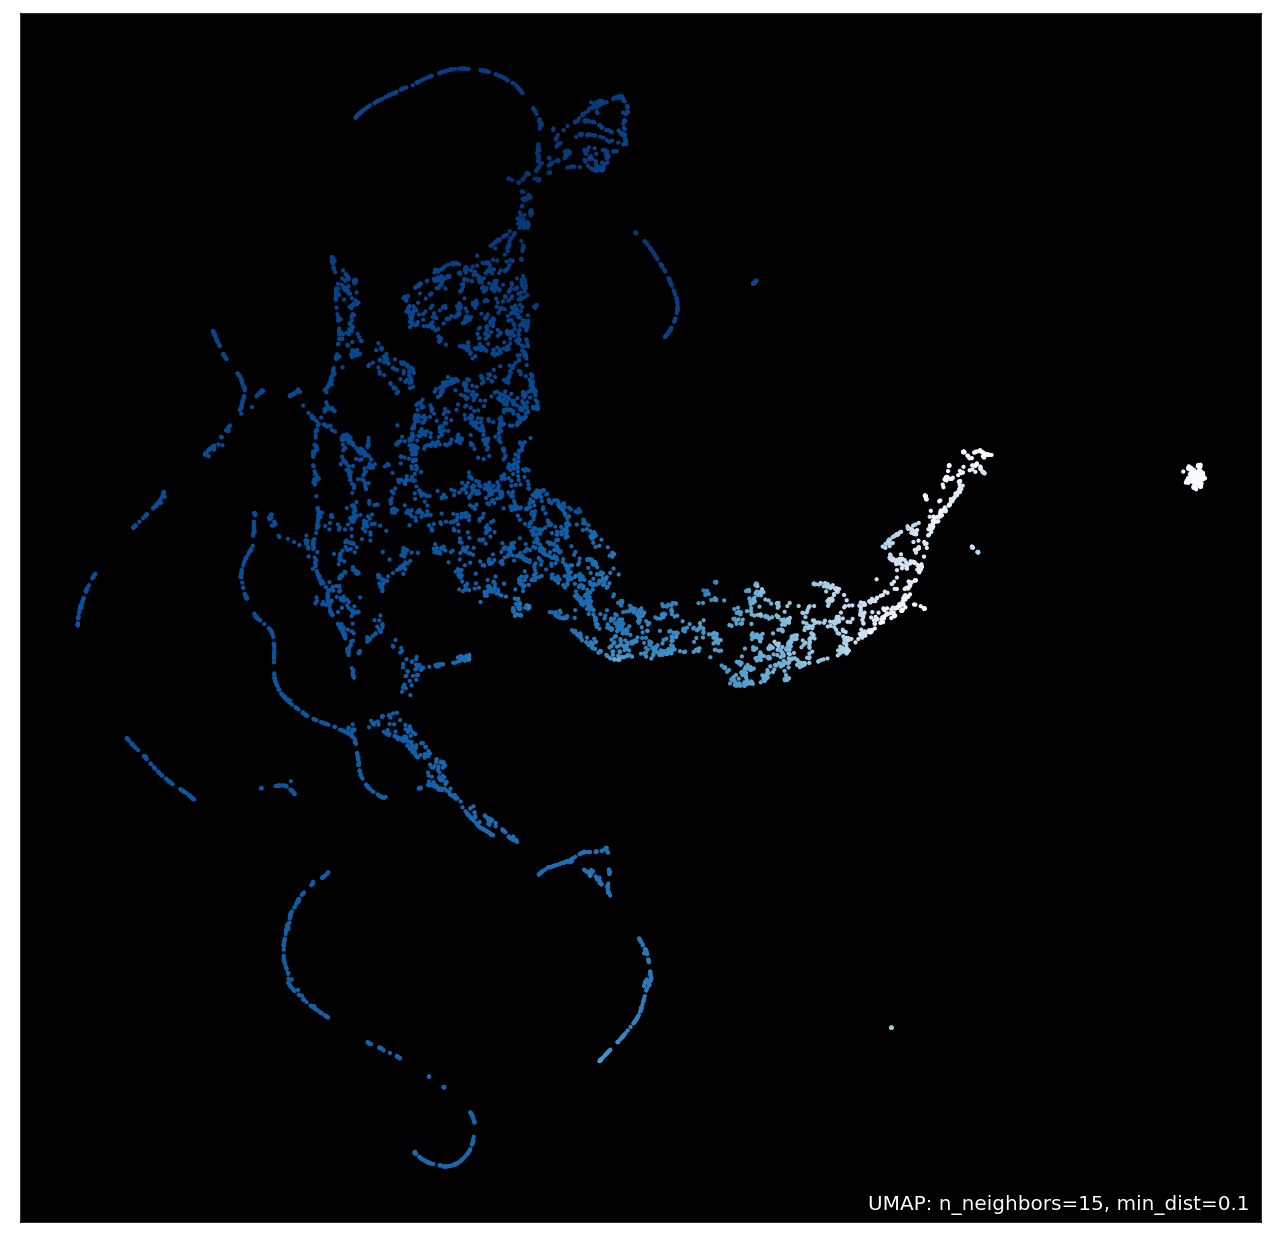

In [27]:
umap.plot.points(mapper_rel,  values=everything.f_2,  background='black') # color_key_cmap='Paired',


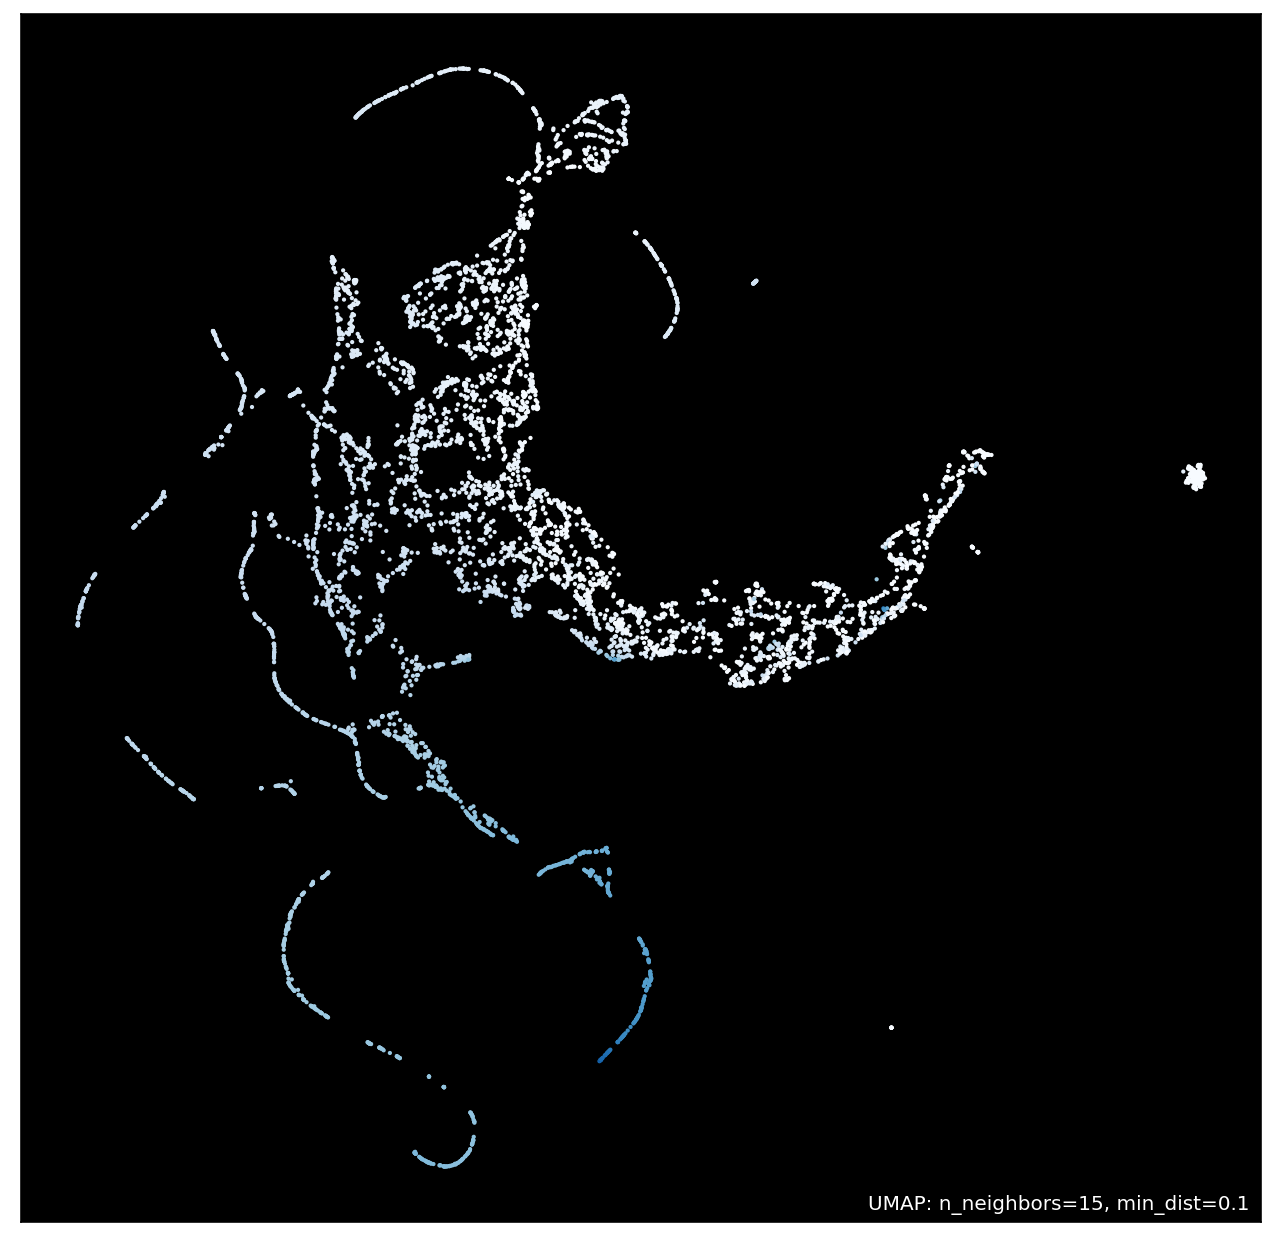

In [28]:
umap.plot.points(mapper_rel,  values=everything.f_3,  background='black') # color_key_cmap='Paired',


## Extremal analyses

 Let's look at the extremes of the UMAP and count labels.

In [29]:
fit = umap.UMAP()
%time u = fit.fit_transform(rel_data)

CPU times: user 4min, sys: 4.66 s, total: 4min 4s
Wall time: 11.1 s


Same as before; I've re-drawn with grid to make it easier to define the extremes.

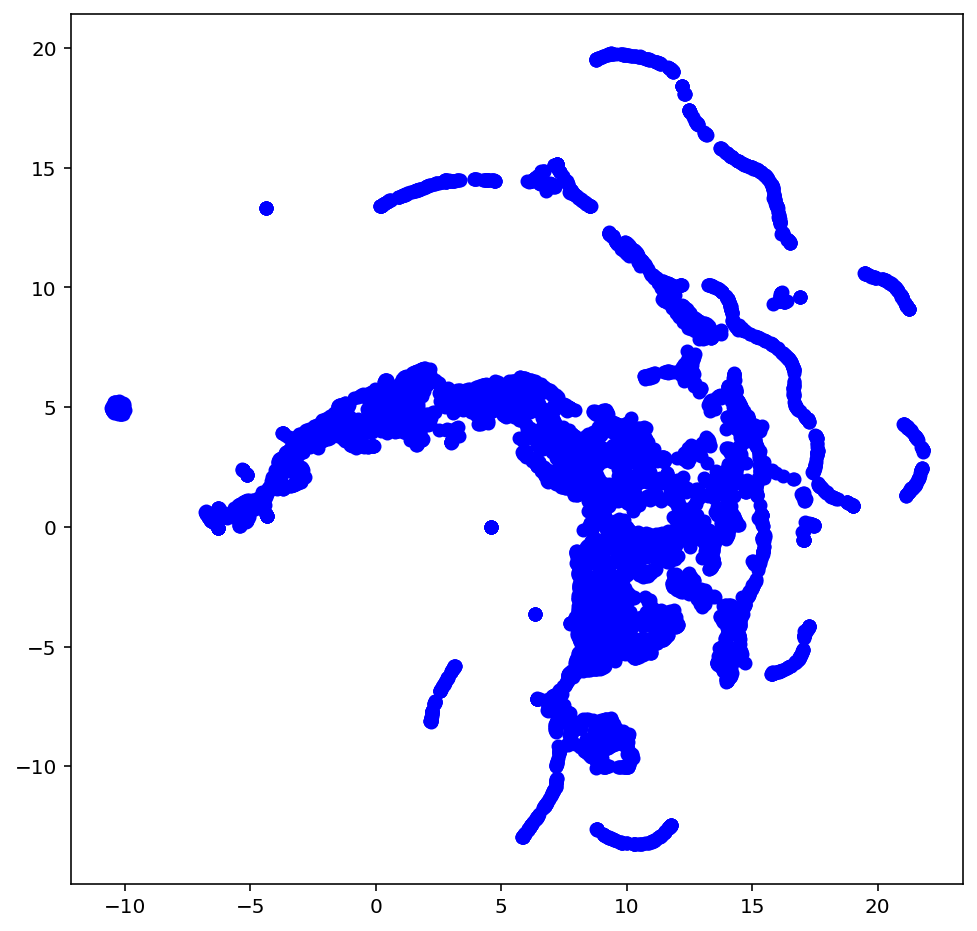

In [30]:
plt.scatter(u[:,0], u[:,1], c="blue")

Let's look at the top left. Defined as all images < 0 on x-axis and > 5 on the y-axis

In [31]:
rows1=np.where(u[:,0]<2)
rows2=np.where(u[:,1]>-1)
rows3=np.where(u[:,1]<10)
#good=np.intersect1d(rows1, rows2)
good=np.intersect1d(np.intersect1d(rows1, rows2), rows3)
print(len(good))

1128


In [32]:
tmp=everything[[  "f_0", "f_1", "f_2", "f_3", "macro_manual_score", "tc_manual_score" ]]
manual_enriched=tmp.iloc[good]
print(manual_enriched)

           f_0       f_1       f_2       f_3 macro_manual_score  \
1     1.000000  0.000000  0.000000  0.000000                 GD   
2     0.005405  0.318919  0.551351  0.124324                  2   
9     0.388889  0.222222  0.388889  0.000000                  2   
10    1.000000  0.000000  0.000000  0.000000                 GD   
12    0.063953  0.389535  0.534884  0.011628                  2   
...        ...       ...       ...       ...                ...   
6586  0.515152  0.363636  0.121212  0.000000                  2   
6587  0.545455  0.393939  0.060606  0.000000                  2   
6588  0.392857  0.214286  0.392857  0.000000                 GD   
6591  0.296774  0.161290  0.412903  0.129032                  1   
6594  0.318182  0.272727  0.363636  0.045455                  1   

     tc_manual_score  
1                 GD  
2                  1  
9                 GD  
10                GD  
12                 1  
...              ...  
6586               1  
6587       

In [33]:
manual_enriched.macro_manual_score.value_counts()

2      428
GD     250
1      225
0      109
E       98
nan     18
Name: macro_manual_score, dtype: int64

In [34]:
manual_enriched.tc_manual_score.value_counts()

1      338
2      290
GD     286
0      200
nan     14
Name: tc_manual_score, dtype: int64

In [35]:
everything.macro_manual_score.value_counts()


2      5685
GD      331
1       307
0       139
E       112
nan      28
Name: macro_manual_score, dtype: int64

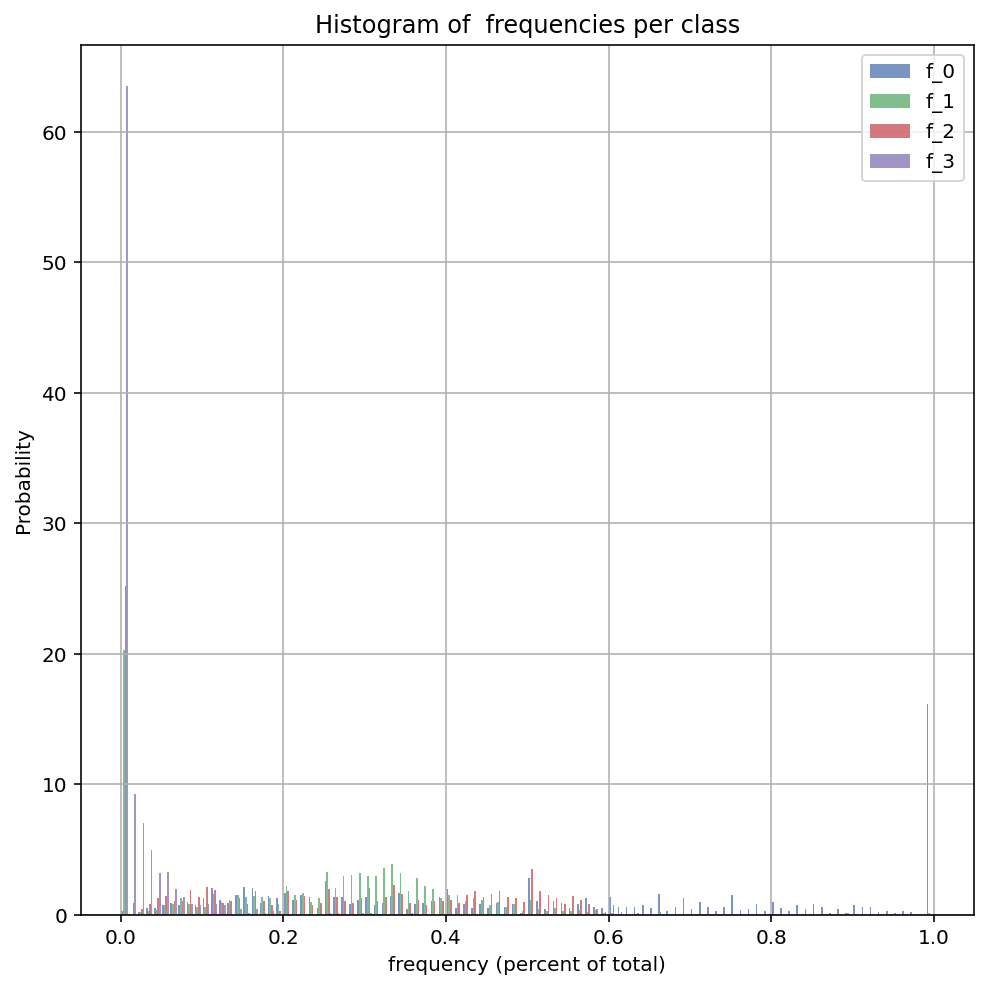

In [36]:
#n, bins, patches = plt.hist(macro_enriched.f_macrophage, 50, density=True, facecolor='g', alpha=0.75)
plt.style.use('seaborn-deep')

n, bins, patches = plt.hist([ 
                             manual_enriched.f_0,
                             manual_enriched.f_1,
                             manual_enriched.f_2,
                             manual_enriched.f_3],  label=[ 'f_0', 'f_1', 'f_2', 'f_3'],
                            bins=100,
                           density=True,  alpha=0.75)

plt.xlabel('frequency (percent of total)')
plt.ylabel('Probability')
plt.title('Histogram of  frequencies per class')
#plt.text(60, .025, r'$\mu=100,\ \sigma=15$')
#plt.xlim(40, 160)
#plt.ylim(0, 0.03)
plt.grid(True)
plt.legend(loc='upper right')

plt.show()

In [37]:
tmp=everything[[ "name.x",  "f_0", "f_1", "f_2", "f_3", "macro_manual_score", "tc_manual_score"]]
manual_enriched=tmp.iloc[good]
print(manual_enriched)

           name.x       f_0       f_1       f_2       f_3 macro_manual_score  \
1           PGA63  1.000000  0.000000  0.000000  0.000000                 GD   
2     C7_00780W_A  0.005405  0.318919  0.551351  0.124324                  2   
9            NOP5  0.388889  0.222222  0.388889  0.000000                  2   
10          SRP54  1.000000  0.000000  0.000000  0.000000                 GD   
12          CDC37  0.063953  0.389535  0.534884  0.011628                  2   
...           ...       ...       ...       ...       ...                ...   
6586         NSP1  0.515152  0.363636  0.121212  0.000000                  2   
6587  C5_00260W_A  0.545455  0.393939  0.060606  0.000000                  2   
6588         SMC4  0.392857  0.214286  0.392857  0.000000                 GD   
6591        SEC62  0.296774  0.161290  0.412903  0.129032                  1   
6594         CCT2  0.318182  0.272727  0.363636  0.045455                  1   

     tc_manual_score  
1               

# Replicates: tc manual annotations


In [64]:
print(everything[['name.x']].iloc[141])

name.x    NaN
Name: 141, dtype: object


In [38]:
reps=everything[["name.x", "replicate",  'plate', 'row', 'column', "n_objects",  "f_0", "f_1", "f_2", "f_3",  "tc_manual_score", "macro_manual_score", "filename"]]
reps.rename(columns={'name.x': 'name'}, inplace=True)
reps[['tc_manual_score']] = reps[['tc_manual_score']].astype(str)
reps[['macro_manual_score']] = reps[['macro_manual_score']].astype(str)
reps1=reps.loc[reps['replicate']==1]
reps2=reps.loc[reps['replicate']==2]
print(reps1)


             name  replicate  plate row  column  n_objects       f_0  \
0            ENP1          1      1   A       1        171  0.000000   
1           PGA63          1      1   A      10          1  1.000000   
2     C7_00780W_A          1      1   A      11        185  0.005405   
3     C3_06820C_A          1      1   A      12        115  0.017391   
4     C6_00640C_A          1      1   A       2        109  0.027523   
...           ...        ...    ...  ..     ...        ...       ...   
3340  CR_05560W_A          1      9   H       5         50  0.060000   
3341        PRP22          1      9   H       6         95  0.073684   
3342         NIP7          1      9   H       7         94  0.170213   
3343         NOG2          1      9   H       8         59  0.050847   
3344  C7_01810W_A          1      9   H       9         42  0.142857   

           f_1       f_2       f_3 tc_manual_score macro_manual_score  \
0     0.017544  0.818713  0.163743               2            

/home/hallett/anaconda3/envs/deepmicroscopy/lib/python3.7/site-packages/pandas/core/frame.py:5047: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,
/home/hallett/anaconda3/envs/deepmicroscopy/lib/python3.7/site-packages/pandas/core/frame.py:3641: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[k1] = value[k2]


In [271]:
idxs = reps[['name', 'plate', 'row', 'column']].drop_duplicates()
idxs=idxs.replace(np.nan, '-')


Compare the number of objects detected in both replicates.

In [272]:
tc_num_objects = pd.DataFrame(columns=['reps1_num', 'reps2_num'], 
                              index=idxs.name)

for i in range(0,len(idxs)):
    pl=idxs.plate.iloc[i]
    rw=idxs.row.iloc[i]
    cl=idxs.column.iloc[i]

    tmp1 = reps1[(reps1["plate"]==pl) & (reps1["row"]==rw) & (reps1["column"]==cl)].n_objects.values
    if (len(tmp1)==0): 
        continue
    tmp2 = reps2[(reps2["plate"]==pl) & (reps2["row"]==rw) & (reps2["column"]==cl)].n_objects.values
    if (len(tmp2)==0):
        continue
    tc_num_objects.at[tc_num_objects.index[i], 'reps1_num'] = tmp1[0]
    tc_num_objects.at[tc_num_objects.index[i], 'reps2_num'] = tmp2[0]

tc_num_objects=tc_num_objects.dropna()

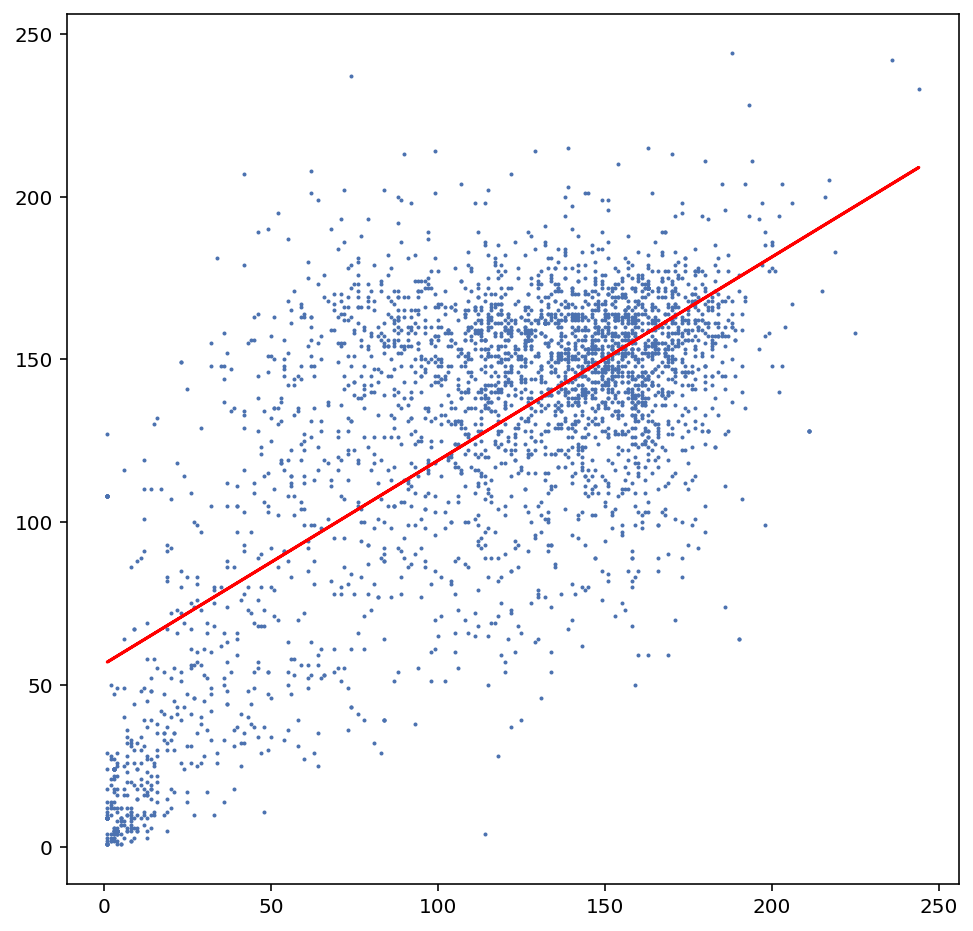

In [110]:
from sklearn.linear_model import LinearRegression
X = tc_num_objects.reps1_num.array.reshape(-1, 1)  # iloc[:, 1] is the column of X
Y = tc_num_objects.reps2_num.array.reshape(-1, 1)  # df.iloc[:, 4] is the column of Y
linear_regressor = LinearRegression()
linear_regressor.fit(X, Y)
Y_pred = linear_regressor.predict(X)

plt.scatter(X, Y, s=1)
plt.plot(X, Y_pred, color='red')
plt.show()

## Now build a confusion matrix comparing replicates.

In [111]:
print(all_tc_classes)
print(all_macro_classes)

['GD', '0', '1', '2', 'nan']
['E', 'GD', '0', '1', '2', 'nan']


In [112]:
confusion_tc_manual= np.zeros( (len(all_tc_classes), len(all_tc_classes)))

for i in range(0,len(idxs)):
    pl=idxs.plate.iloc[i]
    rw=idxs.row.iloc[i]
    cl=idxs.column.iloc[i]
    tmp1 = reps1[(reps1["plate"]==pl) & (reps1["row"]==rw) & (reps1["column"]==cl)].tc_manual_score
    if (len(tmp1)==0): 
        continue
    tmp2 = reps2[(reps2["plate"]==pl) & (reps2["row"]==rw) & (reps2["column"]==cl)].tc_manual_score
    if (len(tmp2)==0):
        continue
    if (all_tc_classes.index(tmp1.values) < all_tc_classes.index(tmp2.values)):
        confusion_tc_manual[all_tc_classes.index(tmp1.values), all_tc_classes.index(tmp2.values)] += 1
    else:
        confusion_tc_manual[all_tc_classes.index(tmp2.values), all_tc_classes.index(tmp1.values)] += 1

In [113]:
print(all_tc_classes, "\n")
with np.printoptions(precision=0, suppress=True):
    print(confusion_tc_manual.astype(int))


['GD', '0', '1', '2', 'nan'] 

[[ 127   14    9   28    0]
 [   0   83   18    1    4]
 [   0    0  155   28    0]
 [   0    0    0 2769    0]
 [   0    0    0    0    7]]


In [114]:
confusion_macro_manual= np.zeros( (len(all_macro_classes), len(all_macro_classes)))

for i in range(0,len(idxs)):
    pl=idxs.plate.iloc[i]
    rw=idxs.row.iloc[i]
    cl=idxs.column.iloc[i]
    tmp1 = reps1[(reps1["plate"]==pl) & (reps1["row"]==rw) & (reps1["column"]==cl)].macro_manual_score
    if (len(tmp1)==0): 
        continue
    tmp2 = reps2[(reps2["plate"]==pl) & (reps2["row"]==rw) & (reps2["column"]==cl)].macro_manual_score
    if (len(tmp2)==0):
        continue
    if (all_macro_classes.index(tmp1.values) < all_macro_classes.index(tmp2.values)):
        confusion_macro_manual[all_macro_classes.index(tmp1.values), all_macro_classes.index(tmp2.values)] += 1
    else:
        confusion_macro_manual[all_macro_classes.index(tmp2.values), all_macro_classes.index(tmp1.values)] += 1

In [115]:
print(all_macro_classes, "\n")
with np.printoptions(precision=0, suppress=True):
    print(confusion_macro_manual.astype(int))


['E', 'GD', '0', '1', '2', 'nan'] 

[[  53    0    0    0    0    0]
 [   0  116   12   16   54    0]
 [   0    0   42   39    2    0]
 [   0    0    0  105   35    0]
 [   0    0    0    0 2756    0]
 [   0    0    0    0    0   13]]


## Compare manual macro vs manual tc

The main question here is to look for images that are labelled differently between macro and tc.


In [142]:
idxs = reps[['name', 'plate', 'row', 'column']].drop_duplicates()

In [143]:
def isnan(value):
    try:
        import math
        return math.isnan(float(value))
    except:
        return False

In [144]:
confusion_manual= np.zeros( (len(all_macro_classes), len(all_tc_classes)))
for i in range(0,len(idxs)):
    pl=idxs.plate.iloc[i]
    rw=idxs.row.iloc[i]
    cl=idxs.column.iloc[i]
    match=False
    
    tmp1_macro = reps1[(reps1["plate"]==pl) & (reps1["row"]==rw) & (reps1["column"]==cl)].macro_manual_score
    tmp2_macro = reps2[(reps2["plate"]==pl) & (reps2["row"]==rw) & (reps2["column"]==cl)].macro_manual_score
    tmp_macro = list(set(tmp1_macro.tolist() + tmp2_macro.tolist()))
    tmp_name = reps1[(reps1["plate"]==pl) & (reps1["row"]==rw) & (reps1["column"]==cl)].name

    tmp1_tc = reps1[(reps1["plate"]==pl) & (reps1["row"]==rw) & (reps1["column"]==cl)].tc_manual_score
    tmp2_tc = reps2[(reps2["plate"]==pl) & (reps2["row"]==rw) & (reps2["column"]==cl)].tc_manual_score
    tmp_tc = list(set(tmp1_tc.tolist() + tmp2_tc.tolist()))

    
    if (len(tmp_macro)==1) and (len(tmp_tc)==1):
        confusion_manual[all_macro_classes.index(tmp_macro[0]), all_tc_classes.index(tmp_tc[0])] += 1
        if (tmp_macro!=tmp_tc):
            if (tmp_macro[0] in {'0', '1'} and (tmp_tc[0]=='2')):
                if (len(tmp_name)>0):
                    print("Gene name: \t", tmp_name.values[0], "\t | Macro : ", tmp_macro[0], "\t | TC: ", tmp_tc[0])
        
    


Gene name: 	 YML6 	 | Macro :  1 	 | TC:  2
Gene name: 	 RPT5 	 | Macro :  1 	 | TC:  2
Gene name: 	 C6_01980C_A 	 | Macro :  1 	 | TC:  2
Gene name: 	 CR_10390W_A 	 | Macro :  1 	 | TC:  2
Gene name: 	 CR_01080W_A 	 | Macro :  1 	 | TC:  2
Gene name: 	 C1_01580W_A 	 | Macro :  1 	 | TC:  2
Gene name: 	 C2_01030W_A 	 | Macro :  1 	 | TC:  2
Gene name: 	 PET9 	 | Macro :  0 	 | TC:  2
Gene name: 	 CR_04140W_A 	 | Macro :  1 	 | TC:  2
Gene name: 	 MED8 	 | Macro :  1 	 | TC:  2
Gene name: 	 SNF1 	 | Macro :  1 	 | TC:  2
Gene name: 	 C6_03730C_A 	 | Macro :  1 	 | TC:  2
Gene name: 	 C1_06070W_A 	 | Macro :  0 	 | TC:  2
Gene name: 	 THR4 	 | Macro :  0 	 | TC:  2
Gene name: 	 MRPL6 	 | Macro :  1 	 | TC:  2
Gene name: 	 MRPL3 	 | Macro :  0 	 | TC:  2
Gene name: 	 SUV3 	 | Macro :  0 	 | TC:  2
Gene name: 	 YPT31 	 | Macro :  0 	 | TC:  2
Gene name: 	 C2_03560C_A 	 | Macro :  1 	 | TC:  2
Gene name: 	 MNN9 	 | Macro :  1 	 | TC:  2
Gene name: 	 CYT1 	 | Macro :  1 	 | TC:  2
Gene name:

In [145]:
print("Rows (Macro): ", all_macro_classes)
with np.printoptions(precision=0, suppress=True):
    print(confusion_manual.astype(int))
print("Columns (TC): ", all_tc_classes)

Rows (Macro):  ['E', 'GD', '0', '1', '2', 'nan']
[[  59    0    0    0    0]
 [  68   10    3   29    0]
 [   0   24   10    8    0]
 [   0   15   36   47    0]
 [   8   17   77 2705    0]
 [   0    0    0    2    9]]
Columns (TC):  ['GD', '0', '1', '2', 'nan']


In [174]:
all_macro_classes_new=['E/GD', '0/1', 'E/GD/0/1']
all_tc_classes_new=['0/1', '2']

In [258]:


confusion_manual2= np.zeros( (len(all_macro_classes_new), len(all_tc_classes_new)))
promising=[]
promising_type=[]

for i in range(0,len(idxs)):
    pl=idxs.plate.iloc[i]
    rw=idxs.row.iloc[i]
    cl=idxs.column.iloc[i]
    match=False
    
    tmp1_macro = reps1[(reps1["plate"]==pl) & (reps1["row"]==rw) & (reps1["column"]==cl)].macro_manual_score
    tmp2_macro = reps2[(reps2["plate"]==pl) & (reps2["row"]==rw) & (reps2["column"]==cl)].macro_manual_score
    tmp_macro = list(set(tmp1_macro.tolist() + tmp2_macro.tolist()))
    tmp_name = reps1[(reps1["plate"]==pl) & (reps1["row"]==rw) & (reps1["column"]==cl)].name

    tmp1_tc = reps1[(reps1["plate"]==pl) & (reps1["row"]==rw) & (reps1["column"]==cl)].tc_manual_score
    tmp2_tc = reps2[(reps2["plate"]==pl) & (reps2["row"]==rw) & (reps2["column"]==cl)].tc_manual_score
    tmp_tc = list(set(tmp1_tc.tolist() + tmp2_tc.tolist()))

    
    if(((len(tmp_macro)==2) and (tmp_macro[0] in {'E', 'GD'}) and (tmp_macro[1] in {'E', 'GD'})) or 
         ((len(tmp_macro)==1) and  (tmp_macro[0] in {'E', 'GD'}))):

        if (((len(tmp_tc)==2) and (tmp_tc[0] in {'0', '1'}) and (tmp_tc[1] in {'0', '1'})) or 
            ((len(tmp_tc)==1) and (tmp_tc[0] in {'0', '1'}))):
            confusion_manual2[all_macro_classes_new.index('E/GD'), all_tc_classes_new.index('0/1')] += 1
            promising.append(i)
            promising_type.append('EGD_to_01')
            if (len(tmp_name)>0):
                print("Gene name: \t", tmp_name.values[0], "\t | Macro : E/GD",  "\t | TC: 0/1 ")

        if ((len(tmp_tc)==1) and (tmp_tc[0] in {'2'})):
            confusion_manual2[all_macro_classes_new.index('E/GD'), all_tc_classes_new.index('2')] += 1
            promising.append(i)
            promising_type.append('EGD_to_2')
            if (len(tmp_name)>0):
                print("Gene name: \t", tmp_name.values[0], "\t | Macro : E/GD",  "\t | TC: '2' ")
        continue
         
        
    if (((len(tmp_macro)==2) and (tmp_macro[0] in {'0', '1'}) and (tmp_macro[1] in {'0', '1'})) or 
         ((len(tmp_macro)==1) and  (tmp_macro[0] in {'0', '1'}))):        

        if ((len(tmp_tc)==1) and (tmp_tc[0] in {'2'})):
            confusion_manual2[all_macro_classes_new.index('0/1'), all_tc_classes_new.index('2')] += 1
            promising.append(i)
            promising_type.append('01_to_2')
            if (len(tmp_name)>0):
                print("Gene name: \t", tmp_name.values[0], "\t | Macro : 0/1",  "\t | TC: 2")
                
        if (((len(tmp_tc)==2) and (tmp_tc[0] in {'0', '1'}) and (tmp_tc[1] in {'0', '1'})) or 
            ((len(tmp_tc)==1) and (tmp_tc[0] in {'0', '1'}))):
            confusion_manual2[all_macro_classes_new.index('0/1'), all_tc_classes_new.index('0/1')] += 1
        continue
            
    if (((len(tmp_macro)==2) and (tmp_macro[0] in {'0', '1', 'E', 'GD'}) and (tmp_macro[1] in {'0', '1', 'E', 'GD'})) or 
         ((len(tmp_macro)==1) and  (tmp_macro[0] in {'0', '1', 'E', 'GD'}))):

        if (((len(tmp_tc)==2) and (tmp_tc[0] in {'0', '1'}) and (tmp_tc[1] in {'0', '1'})) or 
            ((len(tmp_tc)==1) and (tmp_tc[0] in {'0', '1'}))):
            confusion_manual2[all_macro_classes_new.index('E/GD/0/1'), all_tc_classes_new.index('0/1')] += 1
 
        if ((len(tmp_tc)==1) and (tmp_tc[0] in {'2'})):
            confusion_manual2[all_macro_classes_new.index('E/GD/0/1'), all_tc_classes_new.index('2')] += 1
            promising.append(i)
            promising_type.append('EGD01_to_2')
            if (len(tmp_name)>0):
                print("Gene name: \t", tmp_name.values[0], "\t | Macro : E/GD/0/1",  "\t | TC: '2' ")

      
 

Gene name: 	 YML6 	 | Macro : 0/1 	 | TC: 2
Gene name: 	 RPT1 	 | Macro : E/GD 	 | TC: '2' 
Gene name: 	 RPS21 	 | Macro : E/GD 	 | TC: 0/1 
Gene name: 	 RPL28 	 | Macro : E/GD 	 | TC: 0/1 
Gene name: 	 RPT5 	 | Macro : 0/1 	 | TC: 2
Gene name: 	 PUP1 	 | Macro : E/GD 	 | TC: '2' 
Gene name: 	 C6_01980C_A 	 | Macro : 0/1 	 | TC: 2
Gene name: 	 CR_10390W_A 	 | Macro : 0/1 	 | TC: 2
Gene name: 	 CR_01080W_A 	 | Macro : 0/1 	 | TC: 2
Gene name: 	 C1_01580W_A 	 | Macro : 0/1 	 | TC: 2
Gene name: 	 NPL6 	 | Macro : 0/1 	 | TC: 2
Gene name: 	 C2_01030W_A 	 | Macro : 0/1 	 | TC: 2
Gene name: 	 FRS1 	 | Macro : E/GD 	 | TC: '2' 
Gene name: 	 DIP2 	 | Macro : E/GD 	 | TC: '2' 
Gene name: 	 C2_06230W_A 	 | Macro : E/GD 	 | TC: 0/1 
Gene name: 	 FBA1 	 | Macro : E/GD 	 | TC: 0/1 
Gene name: 	 PET9 	 | Macro : 0/1 	 | TC: 2
Gene name: 	 RFA1 	 | Macro : E/GD 	 | TC: '2' 
Gene name: 	 CR_04140W_A 	 | Macro : 0/1 	 | TC: 2
Gene name: 	 MED8 	 | Macro : 0/1 	 | TC: 2
Gene name: 	 ACO1 	 | Macro : 0/1

In [259]:
print("Rows (Macro): ", all_macro_classes_new)
with np.printoptions(precision=0, suppress=True):
    print(confusion_manual2.astype(int))
print("Columns (TC): ", all_tc_classes_new)

Rows (Macro):  ['E/GD', '0/1', 'E/GD/0/1']
[[ 15  29]
 [115  66]
 [ 11   2]]
Columns (TC):  ['0/1', '2']


In [375]:
explore=everything
explore_orig=everything
explore['promising']='No'
explore_orig.rename(columns = {'name.x':'name'}, inplace = True)
explore.rename(columns = {'name.x':'name'}, inplace = True)

for ii in range(0,len(promising)):
    i=promising[ii]
    pl=idxs.plate.iloc[i]
    rw=idxs.row.iloc[i]
    cl=idxs.column.iloc[i]
    match=explore.loc[(explore['plate']==pl) & (explore['row']==rw) & (explore['column']==cl)]
    explore.at[match.index.values, 'promising']=promising_type[ii]

#explore=explore.drop(['high_0', 'high_1', 'high_2', 'high_3',
#       'high_m_gd', 'high_m_e', 'high_m_0', 'high_m_1', 'high_m_2',
#       'high_m_nan', 'high_m_macro_gd', 'high_m_macro_e', 'high_m_macro_0',
#       'high_m_macro_1', 'high_m_macro_2', 'high_m_macro_nan'], axis=1)


In [381]:
print(everything)

                                filename  n_tc         name    f_tc_1  \
0      TC_Phase_R1_P1_A1_1_00d00h00m.bmp   171         ENP1  0.017544   
1     TC_Phase_R1_P1_A10_1_00d00h00m.bmp     1        PGA63  0.000000   
2     TC_Phase_R1_P1_A11_1_00d00h00m.bmp   185  C7_00780W_A  0.318919   
3     TC_Phase_R1_P1_A12_1_00d00h00m.bmp   115  C3_06820C_A  0.139130   
4      TC_Phase_R1_P1_A2_1_00d00h00m.bmp   109  C6_00640C_A  0.119266   
...                                  ...   ...          ...       ...   
6597   TC_Phase_R2_P9_H5_1_00d00h20m.bmp   157  CR_05560W_A  0.057325   
6598   TC_Phase_R2_P9_H6_1_00d00h20m.bmp   151        PRP22  0.066225   
6599   TC_Phase_R2_P9_H7_1_00d00h20m.bmp   171         NIP7  0.239766   
6600   TC_Phase_R2_P9_H8_1_00d00h20m.bmp   166         NOG2  0.204819   
6601   TC_Phase_R2_P9_H9_1_00d00h20m.bmp   207  C7_01810W_A  0.164251   

        f_tc_2    f_tc_3    f_tc_0  a_tc_1  a_tc_2  a_tc_3  ...  high_m_1  \
0     0.818713  0.163743  0.000000       3    

In [389]:
explore=explore.drop(['high_0', 'high_1', 'high_2', 'high_3',
       'high_m_gd', 'high_m_e', 'high_m_0', 'high_m_1', 'high_m_2',
       'high_m_nan', 'high_m_macro_gd', 'high_m_macro_e', 'high_m_macro_0',
       'high_m_macro_1', 'high_m_macro_2', 'high_m_macro_nan'], axis=1)

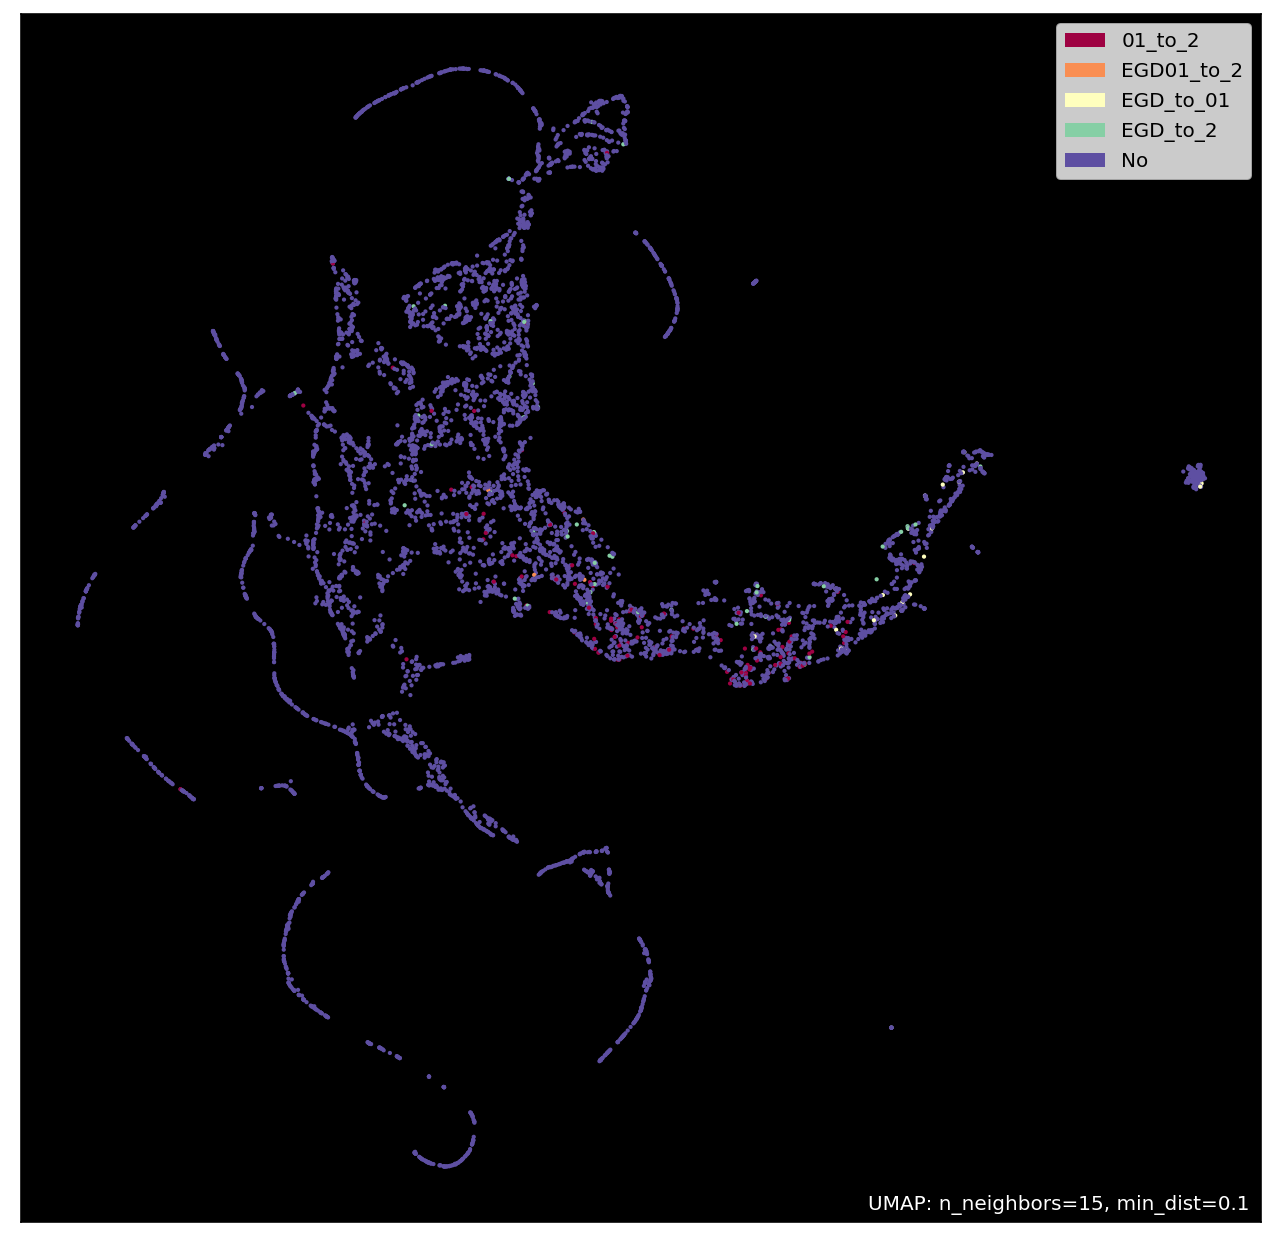

In [376]:
umap.plot.points(mapper_rel, labels=explore['promising'], background='black') # color_key_cmap='Paired')


## Use Candescence to predict location of interesting cases


In [372]:
MACRO_REFINED="/home/data/refined/candescence/performance/grace_macro/"

macro_everything = pd.read_csv(MACRO_REFINED+"python_img_summaries_biglittlelittle_thresh_0.2.csv")
macro_everything[['macro_manual_score']] = macro_everything[['macro_manual_score']].astype(str)
macro_everything.rename(columns = {'name.x':'name', 'n_objects': 'n_macro', 
                                   'f_0':'f_macro_0', 'f_1':'f_macro_1', 'f_2':'f_macro_2', 
                                   'f_macrophage' : 'f_macro_macrophage',
                                   'f_3' : 'f_macro_3', 'f_UFO':'f_macro_UFO', 
                                   'a_0':'a_macro_0', 'a_1':'a_macro_1', 'a_2':'a_macro_2', 
                                   'a_macrophage' : 'a_macro_macrophage', 'a_3':'a_macro_3', 
                                   'a_UFO':'a_macro_UFO'}, inplace = True)
print(macro_everything.columns)


Index(['filename', 'n_macro', 'name', 'f_macro_0', 'f_macro_1', 'f_macro_2',
       'f_macro_macrophage', 'f_macro_3', 'f_macro_UFO', 'a_macro_0',
       'a_macro_1', 'a_macro_2', 'a_macro_macrophage', 'a_macro_3',
       'a_macro_UFO', 'plate', 'row', 'column', 'replicate', 'name.y',
       'macro_manual_score', 'tc_manual_score', 'orf', 'common',
       'feature_name', 'description', 'sc_homologue', 'sc_ko_pheno',
       'Merck Strain ID', 'GELC ID', 'Primary CGD ID', 'YPD morphology',
       'YPD + DOX morphology', 'Serum morphology', 'Serum + DOX morphology',
       '100 μg/mL DOX growth', '5-FOA excision', 'No_DOX_score', 'DOX_Score',
       'Essential_verdict', 'Cidal_test', 'Macrophage + DOX morphology TO1',
       'Macrophage + DOX morphology TO2', 'Variance',
       'Screen pilot rep 1 OD600+DOX 19-03-21',
       'Screen pilot rep 1 MO+DOX 19-03-21',
       'Screen pilot rep 2 OD600+DOX 19-03-21',
       'Screen pilot rep 2 MO+DOX 19-03-21',
       'Screen pilot rep 1 OD600-DO

In [373]:
for i in range(0,len(explore)):
    pl=explore.plate.iloc[i]
    rw=explore.row.iloc[i]
    cl=explore.column.iloc[i]
    nm=explore.at[i, 'name']

    tmp = macro_everything[(macro_everything["plate"]==pl) & (macro_everything["row"]==rw) & (macro_everything["column"]==cl)].name
    tmp=set(tmp.unique())
    if (len(tmp)!=1):
        print("problem at ", i)
    if (not(nm in tmp)):
        print("problem set at ", i)


No output from the above is good news.

In [374]:
for i in range(0,len(macro_everything)):
    pl=macro_everything.plate.iloc[i]
    rw=macro_everything.row.iloc[i]
    cl=macro_everything.column.iloc[i]
    nm=macro_everything.at[i, 'name']

    tmp = explore[(explore["plate"]==pl) & (explore["row"]==rw) & (explore["column"]==cl)].name
    tmp=set(tmp.unique())
    if (len(tmp)!=1):
        print("problem at ", i)
    if (not(nm in tmp)):
        print("problem set at ", i)
    

problem at  2733
problem set at  2733
problem at  6082
problem set at  6082


This is the same gene.

I also need the frequencies and absolute counts from the macro classifier


Now I need to join this with the TC explore table.

In [382]:
explore.rename(columns = {'name.x':'name', 'n_objects': 'n_tc', 
                                   'f_0':'f_tc_0', 'f_1':'f_tc_1', 'f_2':'f_tc_2', 
                                   'f_3' : 'f_tc_3',  
                                   'a_0':'a_tc_0', 'a_1':'a_tc_1', 'a_2':'a_tc_2', 
                                   'a_3':'a_tc_3'}, inplace = True)



In [383]:
print(explore.columns)

Index(['filename', 'n_tc', 'name', 'f_tc_1', 'f_tc_2', 'f_tc_3', 'f_tc_0',
       'a_tc_1', 'a_tc_2', 'a_tc_3', 'a_tc_0', 'plate', 'row', 'column',
       'replicate', 'name.y', 'macro_manual_score', 'tc_manual_score', 'orf',
       'common', 'feature_name', 'description', 'sc_homologue', 'sc_ko_pheno',
       'Merck Strain ID', 'GELC ID', 'Primary CGD ID', 'YPD morphology',
       'YPD + DOX morphology', 'Serum morphology', 'Serum + DOX morphology',
       '100 μg/mL DOX growth', '5-FOA excision', 'No_DOX_score', 'DOX_Score',
       'Essential_verdict', 'Cidal_test', 'Macrophage + DOX morphology TO1',
       'Macrophage + DOX morphology TO2', 'Variance',
       'Screen pilot rep 1 OD600+DOX 19-03-21',
       'Screen pilot rep 1 MO+DOX 19-03-21',
       'Screen pilot rep 2 OD600+DOX 19-03-21',
       'Screen pilot rep 2 MO+DOX 19-03-21',
       'Screen pilot rep 1 OD600-DOX 19-03-21',
       'Screen pilot rep 1 MO-DOX 19-03-21',
       'Screen pilot rep 1 counter+DOX 19-03-21',
       

In [384]:
sub_explore=explore[['filename', 'n_tc', 'name', 'f_tc_1', 'f_tc_2', 'f_tc_3', 'f_tc_0',
       'a_tc_1', 'a_tc_2', 'a_tc_3', 'a_tc_0',  'plate', 'row', 'column',
       'replicate']]
print(sub_explore.columns)


Index(['filename', 'n_tc', 'name', 'f_tc_1', 'f_tc_2', 'f_tc_3', 'f_tc_0',
       'a_tc_1', 'a_tc_2', 'a_tc_3', 'a_tc_0', 'plate', 'row', 'column',
       'replicate'],
      dtype='object')


In [473]:
tot = pd.merge(macro_everything, sub_explore, on=['plate', 'row', 'column','replicate', 'name'])

In [474]:
print(tot.columns)


Index(['filename_x', 'n_macro', 'name', 'f_macro_0', 'f_macro_1', 'f_macro_2',
       'f_macro_macrophage', 'f_macro_3', 'f_macro_UFO', 'a_macro_0',
       'a_macro_1', 'a_macro_2', 'a_macro_macrophage', 'a_macro_3',
       'a_macro_UFO', 'plate', 'row', 'column', 'replicate', 'name.y',
       'macro_manual_score', 'tc_manual_score', 'orf', 'common',
       'feature_name', 'description', 'sc_homologue', 'sc_ko_pheno',
       'Merck Strain ID', 'GELC ID', 'Primary CGD ID', 'YPD morphology',
       'YPD + DOX morphology', 'Serum morphology', 'Serum + DOX morphology',
       '100 μg/mL DOX growth', '5-FOA excision', 'No_DOX_score', 'DOX_Score',
       'Essential_verdict', 'Cidal_test', 'Macrophage + DOX morphology TO1',
       'Macrophage + DOX morphology TO2', 'Variance',
       'Screen pilot rep 1 OD600+DOX 19-03-21',
       'Screen pilot rep 1 MO+DOX 19-03-21',
       'Screen pilot rep 2 OD600+DOX 19-03-21',
       'Screen pilot rep 2 MO+DOX 19-03-21',
       'Screen pilot rep 1 OD600-

In [475]:
print(tot.shape)
print(macro_everything.shape)
print(sub_explore.shape)


(6490, 65)
(6608, 55)
(6602, 15)


In [476]:
tot[['tc_a_no_fil']]=0
tot[['tc_a_fil']]=0

tot[['macro_a_no_fil']]=0
tot[['macro_a_fil']]=0

tot[['tc_adj_n']]=0
tot[['macro_adj_n']]=0

for i in range(0,len(tot)):
    tot.at[i, 'tc_a_no_fil']=(tot.a_tc_0.iloc[i] + tot.a_tc_1.iloc[i])
    tot.at[i, 'tc_a_fil']=(tot.a_tc_2.iloc[i] + tot.a_tc_3.iloc[i])
    tot.at[i, 'tc_f_no_fil']=tot.at[i, 'tc_a_no_fil']/(tot.at[i, 'tc_a_no_fil'] + tot.at[i, 'tc_a_fil']) if (tot.at[i, 'tc_a_no_fil'] + tot.at[i, 'tc_a_fil'] > 0) else -1
    tot.at[i, 'tc_f_fil']=tot.at[i, 'tc_a_fil']/(tot.at[i, 'tc_a_no_fil'] + tot.at[i, 'tc_a_fil']) if (tot.at[i, 'tc_a_no_fil'] + tot.at[i, 'tc_a_fil'] > 0) else -1
    tot.at[i, 'tc_adj_n']=tot.at[i, 'tc_a_no_fil'] + tot.at[i, 'tc_a_fil']
    
    tot.at[i, 'macro_a_no_fil']=(tot.a_macro_0.iloc[i] + tot.a_macro_1.iloc[i])
    tot.at[i, 'macro_a_fil']=(tot.a_macro_2.iloc[i] + tot.a_macro_3.iloc[i])
    tot.at[i, 'macro_f_no_fil']=tot.at[i, 'macro_a_no_fil']/(tot.at[i, 'macro_a_no_fil'] + tot.at[i, 'macro_a_fil']) if (tot.at[i, 'macro_a_no_fil'] + tot.at[i, 'macro_a_fil'] > 0) else -1
    tot.at[i, 'macro_f_fil']=tot.at[i, 'macro_a_fil']/(tot.at[i, 'macro_a_no_fil'] + tot.at[i, 'macro_a_fil']) if (tot.at[i, 'macro_a_no_fil'] + tot.at[i, 'macro_a_fil'] > 0) else -1
    tot.at[i, 'macro_adj_n']=tot.at[i, 'macro_a_no_fil'] + tot.at[i, 'macro_a_fil']

In [477]:
print(tot.columns)

Index(['filename_x', 'n_macro', 'name', 'f_macro_0', 'f_macro_1', 'f_macro_2',
       'f_macro_macrophage', 'f_macro_3', 'f_macro_UFO', 'a_macro_0',
       'a_macro_1', 'a_macro_2', 'a_macro_macrophage', 'a_macro_3',
       'a_macro_UFO', 'plate', 'row', 'column', 'replicate', 'name.y',
       'macro_manual_score', 'tc_manual_score', 'orf', 'common',
       'feature_name', 'description', 'sc_homologue', 'sc_ko_pheno',
       'Merck Strain ID', 'GELC ID', 'Primary CGD ID', 'YPD morphology',
       'YPD + DOX morphology', 'Serum morphology', 'Serum + DOX morphology',
       '100 μg/mL DOX growth', '5-FOA excision', 'No_DOX_score', 'DOX_Score',
       'Essential_verdict', 'Cidal_test', 'Macrophage + DOX morphology TO1',
       'Macrophage + DOX morphology TO2', 'Variance',
       'Screen pilot rep 1 OD600+DOX 19-03-21',
       'Screen pilot rep 1 MO+DOX 19-03-21',
       'Screen pilot rep 2 OD600+DOX 19-03-21',
       'Screen pilot rep 2 MO+DOX 19-03-21',
       'Screen pilot rep 1 OD600-

## The number  of TC cells (of all types 0-3) vs. macro cells (of all types 0-3) 

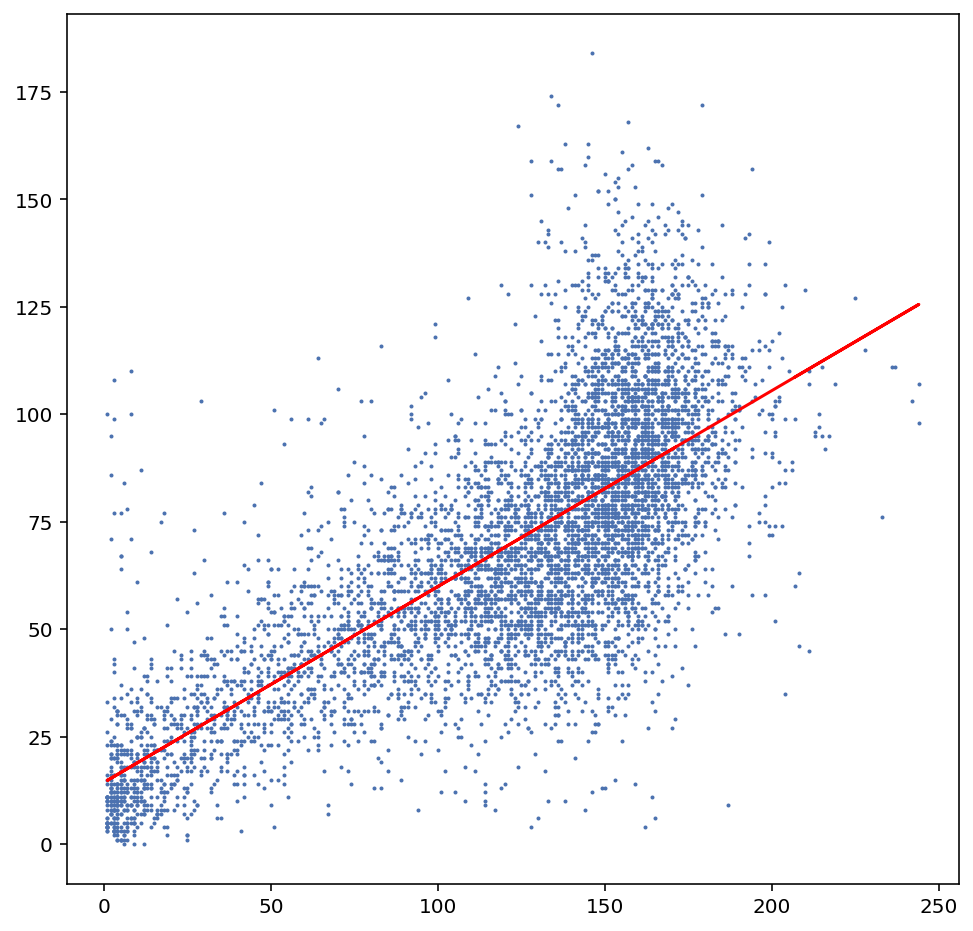

In [478]:
from sklearn.linear_model import LinearRegression
X = tot.tc_adj_n.array.reshape(-1, 1)  # df.iloc[:, 4] is the column of Y
Y = tot.macro_adj_n.array.reshape(-1, 1)  # iloc[:, 1] is the column of X
linear_regressor = LinearRegression()
linear_regressor.fit(X, Y)
Y_pred = linear_regressor.predict(X)

plt.scatter(X, Y, s=1)
plt.plot(X, Y_pred, color='red')
plt.show()

##  number of TC cells (of all types 0-3) vs number of non-fil macro cells (of  types 0-1) vs

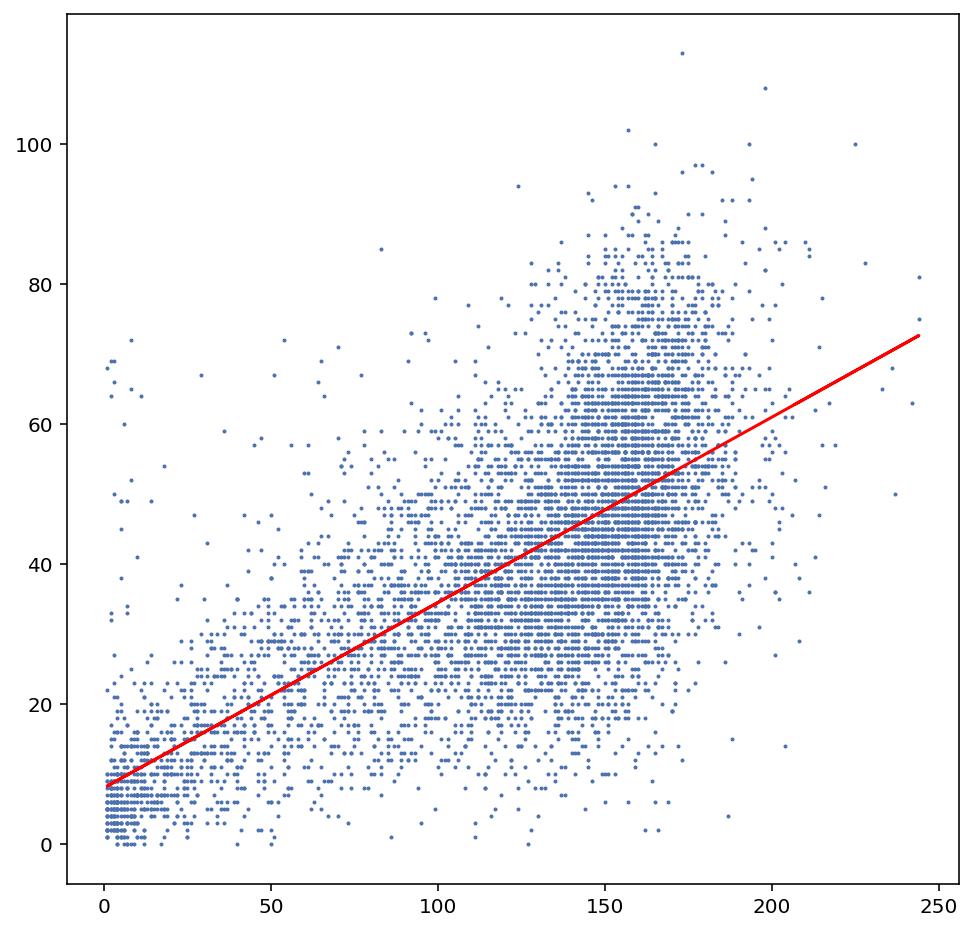

In [479]:
from sklearn.linear_model import LinearRegression
X = tot.tc_adj_n.array.reshape(-1, 1)  # df.iloc[:, 4] is the column of Y
Y = tot.macro_a_no_fil.array.reshape(-1, 1)  # iloc[:, 1] is the column of X
linear_regressor = LinearRegression()
linear_regressor.fit(X, Y)
Y_pred = linear_regressor.predict(X)

plt.scatter(X, Y, s=1)
plt.plot(X, Y_pred, color='red')
plt.show()

##  Number of filamentous TC cells (2-3) vs non-filamentous macro cells (of  types 0-1) 

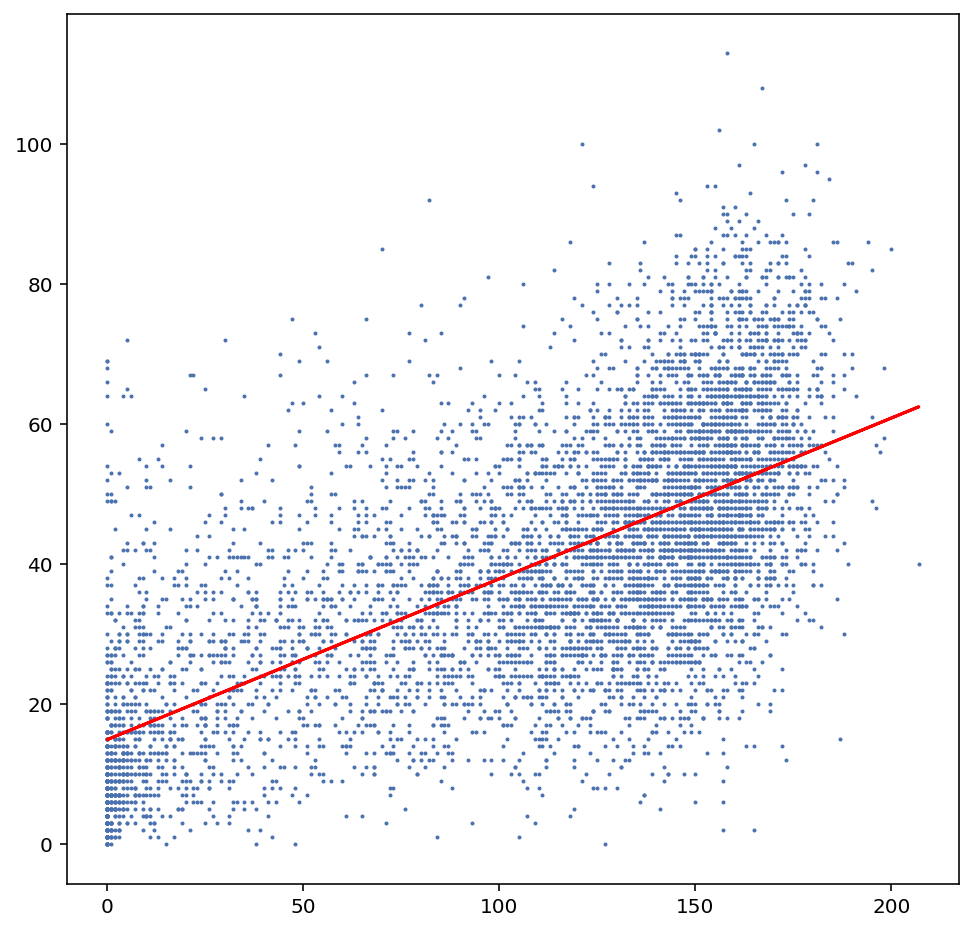

In [480]:
from sklearn.linear_model import LinearRegression
X = tot.tc_a_fil.array.reshape(-1, 1)  # df.iloc[:, 4] is the column of Y
Y = tot.macro_a_no_fil.array.reshape(-1, 1)  # iloc[:, 1] is the column of X
linear_regressor = LinearRegression()
linear_regressor.fit(X, Y)
Y_pred = linear_regressor.predict(X)

plt.scatter(X, Y, s=1)
plt.plot(X, Y_pred, color='red')
plt.show()

##  Number of fil TC cells (of all types 2-3) vs. fil macro cells (of  types 2-3) 

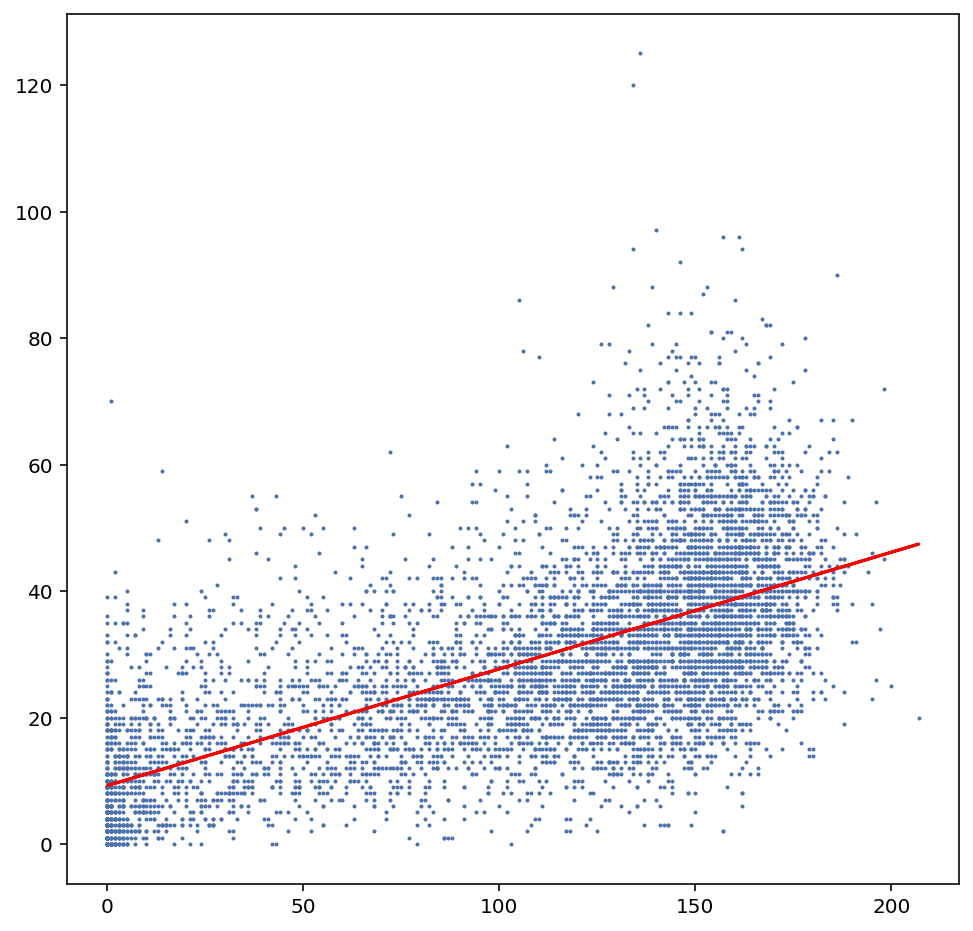

In [481]:
from sklearn.linear_model import LinearRegression
X = tot.tc_a_fil.array.reshape(-1, 1)  # df.iloc[:, 4] is the column of Y
Y = tot.macro_a_fil.array.reshape(-1, 1)  # iloc[:, 1] is the column of X
linear_regressor = LinearRegression()
linear_regressor.fit(X, Y)
Y_pred = linear_regressor.predict(X)

plt.scatter(X, Y, s=1)
plt.plot(X, Y_pred, color='red')
plt.show()

In [482]:
print(tot.columns)

Index(['filename_x', 'n_macro', 'name', 'f_macro_0', 'f_macro_1', 'f_macro_2',
       'f_macro_macrophage', 'f_macro_3', 'f_macro_UFO', 'a_macro_0',
       'a_macro_1', 'a_macro_2', 'a_macro_macrophage', 'a_macro_3',
       'a_macro_UFO', 'plate', 'row', 'column', 'replicate', 'name.y',
       'macro_manual_score', 'tc_manual_score', 'orf', 'common',
       'feature_name', 'description', 'sc_homologue', 'sc_ko_pheno',
       'Merck Strain ID', 'GELC ID', 'Primary CGD ID', 'YPD morphology',
       'YPD + DOX morphology', 'Serum morphology', 'Serum + DOX morphology',
       '100 μg/mL DOX growth', '5-FOA excision', 'No_DOX_score', 'DOX_Score',
       'Essential_verdict', 'Cidal_test', 'Macrophage + DOX morphology TO1',
       'Macrophage + DOX morphology TO2', 'Variance',
       'Screen pilot rep 1 OD600+DOX 19-03-21',
       'Screen pilot rep 1 MO+DOX 19-03-21',
       'Screen pilot rep 2 OD600+DOX 19-03-21',
       'Screen pilot rep 2 MO+DOX 19-03-21',
       'Screen pilot rep 1 OD600-

In [551]:
tmp=tot[['n_macro', 'n_tc', 'name', 'macro_manual_score', 'tc_manual_score', 'sc_homologue','f_macro_0', 'f_macro_1', 'f_macro_2',
       'f_macro_macrophage', 'f_macro_3', 'f_macro_UFO', 'a_macro_0',
       'a_macro_1', 'a_macro_2', 'a_macro_macrophage', 'a_macro_3',
       'a_macro_UFO',  'f_tc_1', 'f_tc_2',
       'f_tc_3', 'f_tc_0', 'a_tc_1', 'a_tc_2', 'a_tc_3', 'a_tc_0',
       'tc_a_no_fil', 'tc_a_fil', 'macro_a_no_fil', 'macro_a_fil',
       'tc_f_no_fil', 'tc_f_fil', 'macro_f_no_fil', 'macro_f_fil', 'tc_adj_n',
       'macro_adj_n', 'plate', 'row', 'column', 'replicate']]
tmp = tmp[tmp['macro_manual_score'].isin([ 'GD'])]

In [552]:
tmp['tc_manual_score_num']=0
for i in range(0,len(tmp)):
    if (tmp['tc_manual_score'].iloc[i]=='E'):
        tmp.at[i,'tc_manual_score_num']=-2
    elif (tmp['tc_manual_score'].iloc[i]=='GD'):
        tmp.at[i,'tc_manual_score_num']=-1
    else:
        tmp.at[i,'tc_manual_score_num']=int(tmp['tc_manual_score'].iloc[i])
    
print(tmp['tc_manual_score_num'])


1     -1.0
10    -1.0
16     1.0
21    -1.0
29    -1.0
      ... 
322    2.0
323    2.0
324    2.0
325    2.0
326    2.0
Name: tc_manual_score_num, Length: 615, dtype: float64


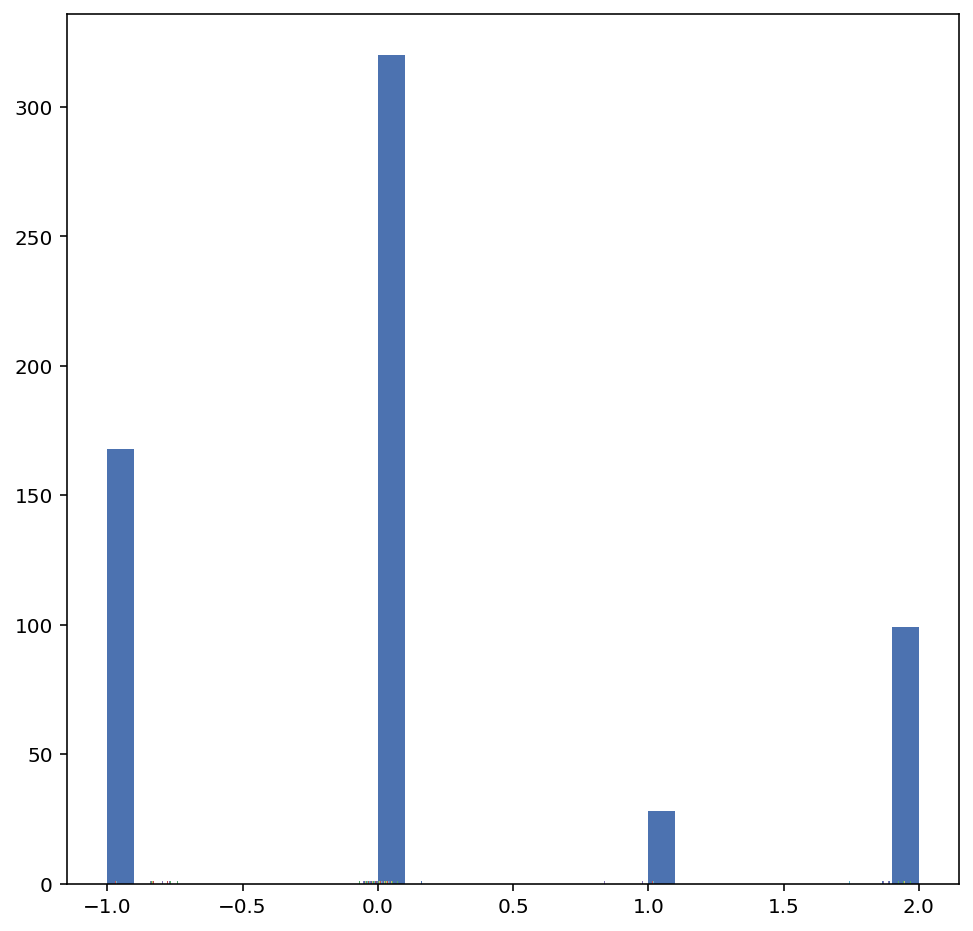

In [553]:
plt.hist(tmp['tc_manual_score_num'],  bins=30) 
plt.hist(X)
plt.show() 

In [556]:
# 'tc_a_no_fil', 'tc_a_fil', 'macro_a_no_fil', 'macro_a_fil',
print(tot[['tc_f_no_fil', 'tc_f_fil', 'macro_f_no_fil', 'macro_f_fil']])

      tc_f_no_fil  tc_f_fil  macro_f_no_fil  macro_f_fil
0        0.017544  0.982456        0.567164     0.432836
1        1.000000  0.000000        1.000000     0.000000
2        0.324324  0.675676        0.647541     0.352459
3        0.156522  0.843478        0.704225     0.295775
4        0.146789  0.853211        0.710526     0.289474
...           ...       ...             ...          ...
6485     0.082803  0.917197        0.539474     0.460526
6486     0.092715  0.907285        0.572917     0.427083
6487     0.345029  0.654971        0.557895     0.442105
6488     0.319277  0.680723        0.551724     0.448276
6489     0.231884  0.768116        0.525253     0.474747

[6490 rows x 4 columns]


In [ ]:
from scipy.spatial import distance

tot[['dist']]=0.0
for i in range(0,len(tot)):
    tot.at[i, 'dist']=distance.euclidean(tot[['tc_f_no_fil', 'tc_f_fil']].iloc[i], tot[['macro_f_no_fil', 'macro_f_fil']].iloc[1])

In [563]:
a = tot[['tc_f_no_fil', 'tc_f_fil']].iloc[1]
b = tot[['macro_f_no_fil', 'macro_f_fil']].iloc[1]
dst = distance.euclidean(a, b)
print(dst)

0.0


### OBSOLETE

In [98]:
explore_rare_95=everything[[ "filename", "name.x",  "high_0", "high_1", "high_2", "high_3"]]
print(explore_rare_95)
explore_rare_95['num_special']=explore_rare_95.sum(axis=1)
explore_rare_95['num_special'].value_counts()

                                filename       name.x  high_0  high_1  high_2  \
0      TC_Phase_R1_P1_A1_1_00d00h00m.bmp         ENP1   False   False   False   
1     TC_Phase_R1_P1_A10_1_00d00h00m.bmp        PGA63    True   False   False   
2     TC_Phase_R1_P1_A11_1_00d00h00m.bmp  C7_00780W_A   False   False   False   
3     TC_Phase_R1_P1_A12_1_00d00h00m.bmp  C3_06820C_A   False   False   False   
4      TC_Phase_R1_P1_A2_1_00d00h00m.bmp  C6_00640C_A   False   False   False   
...                                  ...          ...     ...     ...     ...   
6597   TC_Phase_R2_P9_H5_1_00d00h20m.bmp  CR_05560W_A   False   False   False   
6598   TC_Phase_R2_P9_H6_1_00d00h20m.bmp        PRP22   False   False   False   
6599   TC_Phase_R2_P9_H7_1_00d00h20m.bmp         NIP7   False   False   False   
6600   TC_Phase_R2_P9_H8_1_00d00h20m.bmp         NOG2   False   False   False   
6601   TC_Phase_R2_P9_H9_1_00d00h20m.bmp  C7_01810W_A   False   False   False   

      high_3  
0      False

/tmp/ipykernel_23859/368511016.py:3: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  explore_rare_95['num_special']=explore_rare_95.sum(axis=1)
/tmp/ipykernel_23859/368511016.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  explore_rare_95['num_special']=explore_rare_95.sum(axis=1)


0    5297
1    1304
2       1
Name: num_special, dtype: int64

<AxesSubplot:>

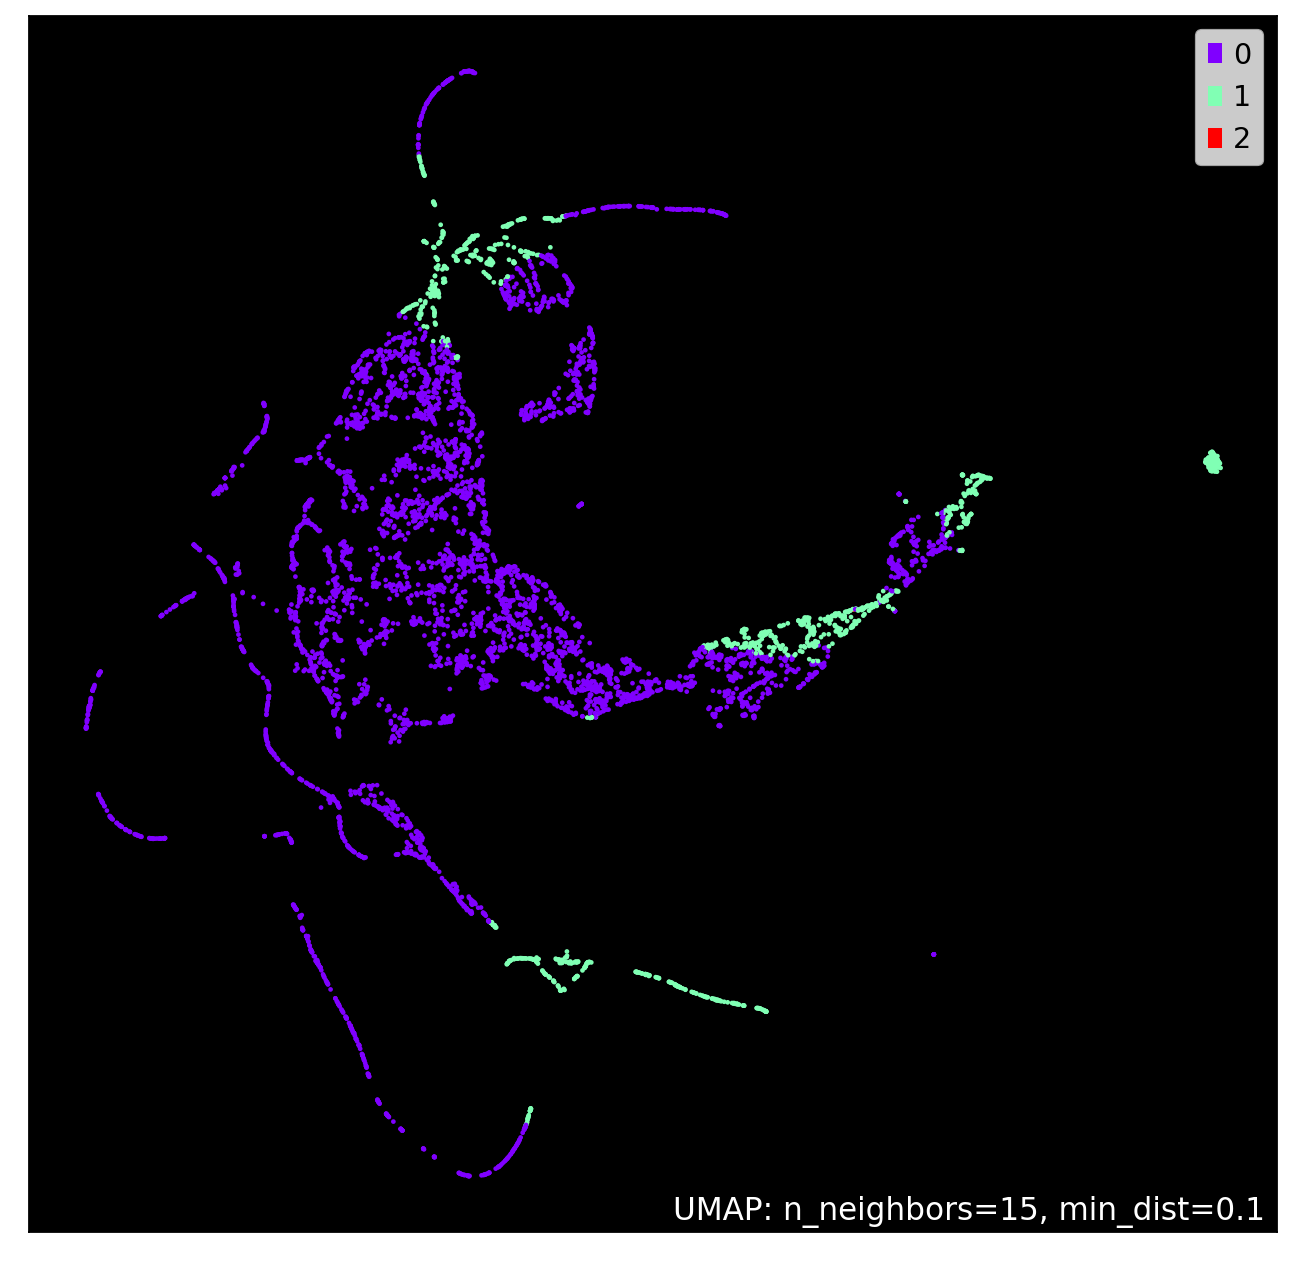

In [99]:
umap.plot.points(mapper_rel,  labels=explore_rare_95.num_special, theme='fire') # color_key_cmap='Paired',


In [100]:
triplets = explore_rare_95[explore_rare_95.num_special==3]
print(triplets.drop(columns=["filename"]))

Empty DataFrame
Columns: [name.x, high_0, high_1, high_2, high_3, num_special]
Index: []


In [101]:
doublets = explore_rare_95[explore_rare_95.num_special==2]
print(doublets.drop(columns=["filename"])[151:180])

Empty DataFrame
Columns: [name.x, high_0, high_1, high_2, high_3, num_special]
Index: []


In [332]:
singletons_0 = explore_rare_95[explore_rare_95.num_special==1] # and explore_rare_95.high_0==True]
singletons_0 = singletons_0[singletons_0.high_0==True]
singletons_0 = singletons_0.drop(columns=["filename"])
print(singletons_0[0:50])

           name.x  high_macrophage  high_0  high_1  high_2  high_3  \
12          CDC37            False    True   False   False   False   
20           ERG3            False    True   False   False   False   
32           AGM1            False    True   False   False   False   
34    C1_14240W_A            False    True   False   False   False   
40    C4_05210W_A            False    True   False   False   False   
41    CR_02770C_A            False    True   False   False   False   
43           VAS1            False    True   False   False   False   
44    C4_05820W_A            False    True   False   False   False   
50           TFA1            False    True   False   False   False   
63           NOG1            False    True   False   False   False   
69           RRS1            False    True   False   False   False   
81           ERG4            False    True   False   False   False   
87           KRE9            False    True   False   False   False   
119         UTP22   

<AxesSubplot:>

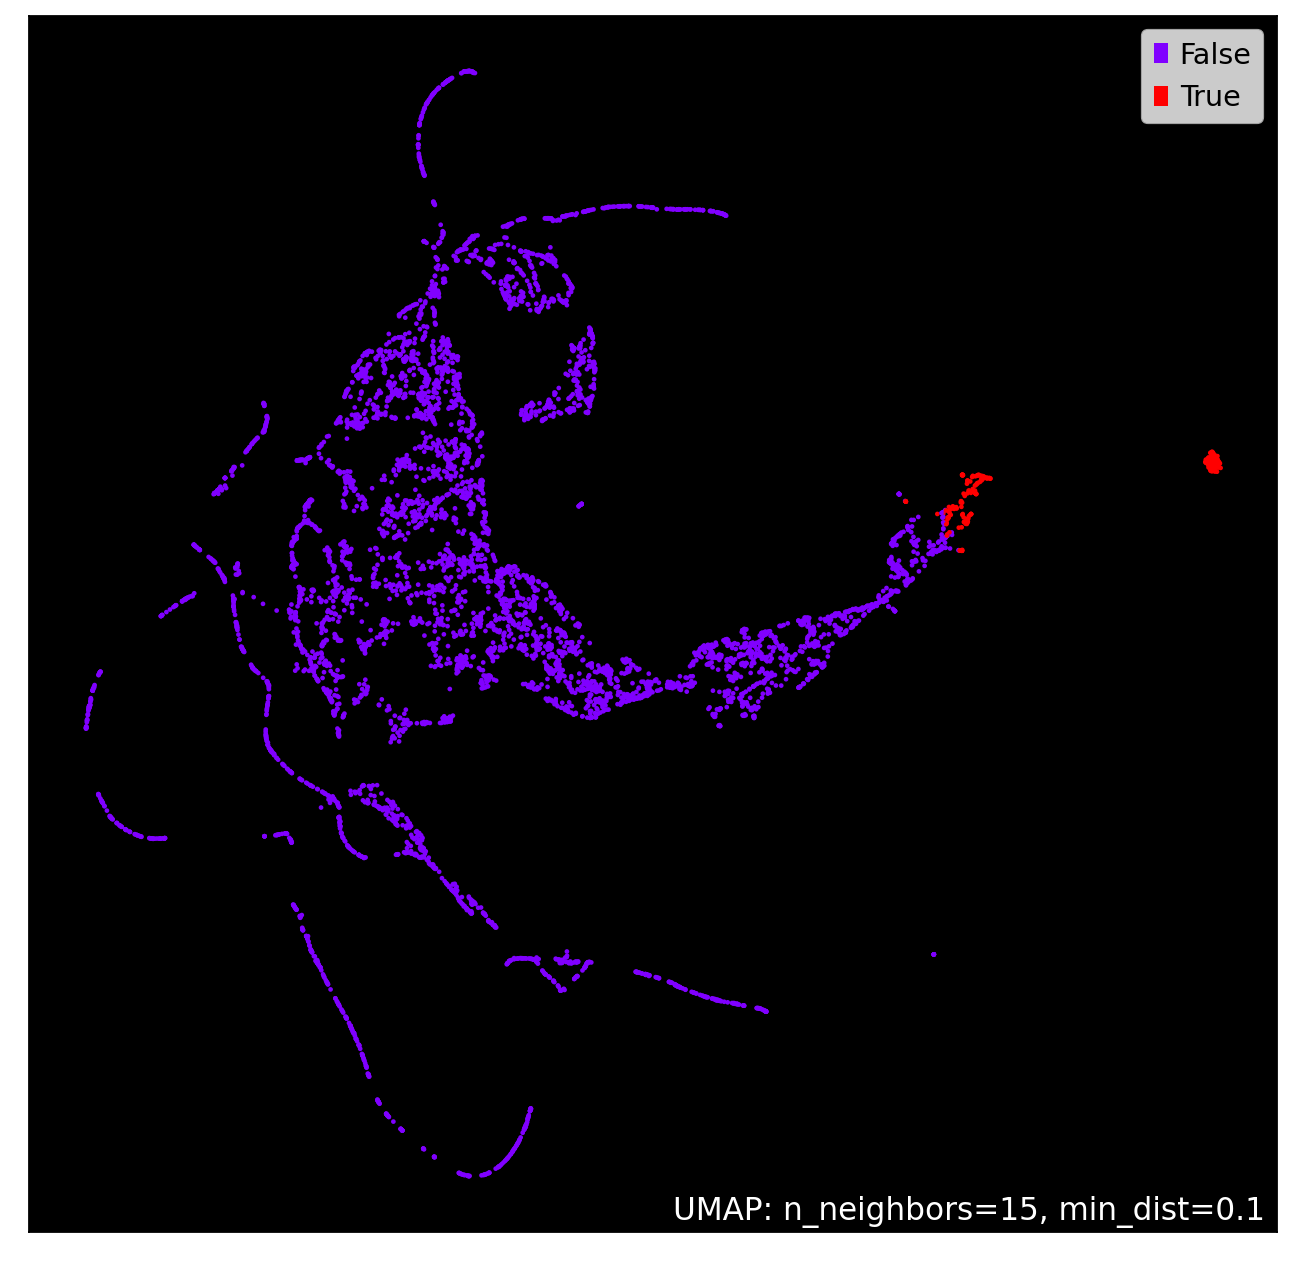

In [102]:
umap.plot.points(mapper_rel,  labels=explore_rare_95.high_0, theme='fire') # color_key_cmap='Paired',


<AxesSubplot:>

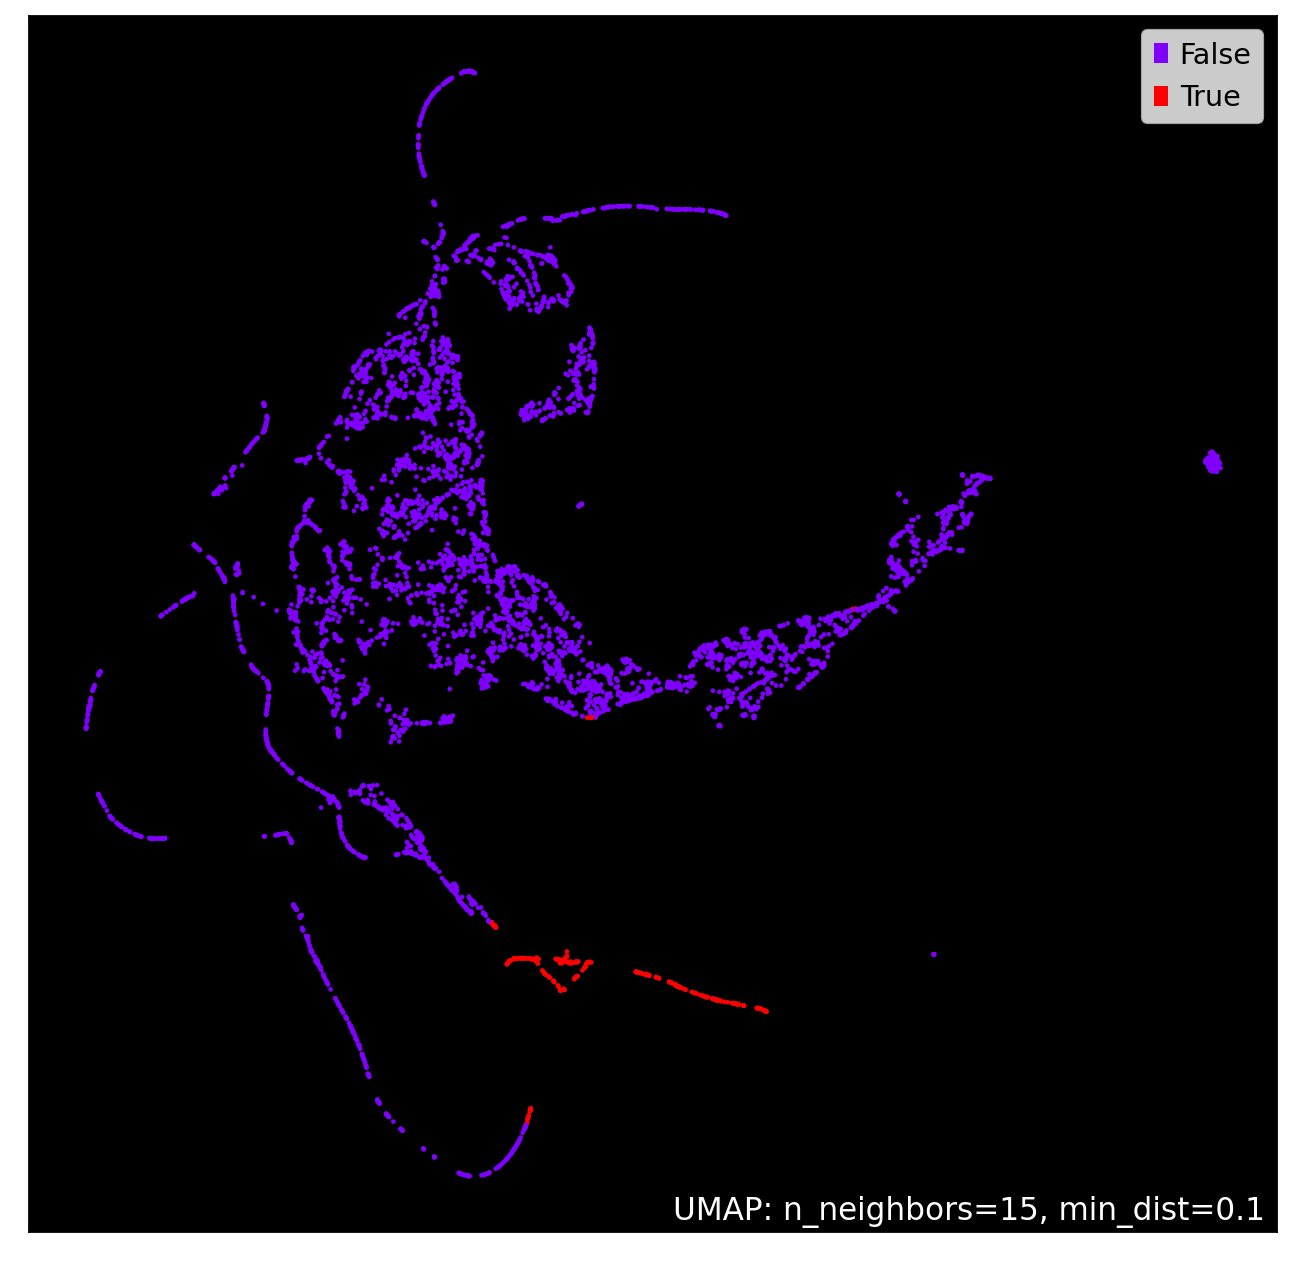

In [103]:
umap.plot.points(mapper_rel,  labels=explore_rare_95.high_3, theme='fire') # color_key_cmap='Paired',


In [104]:
singletons_3 = explore_rare_95[explore_rare_95.num_special==1] # and explore_rare_95.high_0==True]
singletons_3 = singletons_3[singletons_3.high_3==True]
singletons_3 = singletons_3.drop(columns=["filename"])
singletons_3.rename(columns = {'name.x':'name'}, inplace = True)

print(singletons_3[1:50])

                   name  high_0  high_1  high_2  high_3  num_special
360         C2_01340W_A   False   False   False    True            1
376                ZRT2   False   False   False    True            1
384                HNM1   False   False   False    True            1
459              PHO114   False   False   False    True            1
590         CR_08560C_A   False   False   False    True            1
610                TCP1   False   False   False    True            1
652                SOG2   False   False   False    True            1
653         C2_00830C_A   False   False   False    True            1
664               EXO84   False   False   False    True            1
694                CAM1   False   False   False    True            1
743         C2_01660C_A   False   False   False    True            1
745               VPS20   False   False   False    True            1
751               MRE11   False   False   False    True            1
753         C1_01190C_A   False   

storage of old code

In [ ]:
import pandas as pd
import numpy as np
import umap
import umap.plot

mapper = umap.UMAP().fit(df_data)
umap.plot.points(mapper)


In [ ]:
import hdbscan
import sklearn.cluster as cluster
from sklearn.metrics import adjusted_rand_score, adjusted_mutual_info_score

In [ ]:
kmeans_labels = cluster.KMeans(n_clusters=10).fit_predict(df_data)

In [ ]:
import matplotlib.pyplot as plt
plt.scatter(
    embedding_abs[:, 0],
    embedding_abs[:, 1]
   # c=[sns.color_palette()[x] for x in df.species_short.map({"Adelie":0, "Chinstrap":1, "Gentoo":2})])
)
plt.gca().set_aspect('equal', 'datalim')
plt.title('UMAP projection of the Grace dataset (absolute)', fontsize=24)

In [ ]:
left=tmp.iloc[np.where(u[:,0]<5)]
left.macro_manual_score.value_counts()

In [ ]:
right=tmp.iloc[np.where(u[:,0]>=5)]
right.macro_manual_score.value_counts()